# **House Price Prediction**

### Problem Statement

**Ask a home buyer to describe their dream house, and they'll likely start with the number of bedrooms, bathrooms, or overall square footage. But which of these factors actually drive house prices? How accurately can we predict a home's sale price?**

The challenge of this project is to develop a machine learning model that can accurately predict residential home prices based on a diverse set of attributes. Real estate valuation is a complex process influenced by numerous factors, including physical property attributes, location characteristics, market conditions, and subjective quality assessments.

## Specific Objectives

1. **Predictive Modeling**: Develop a regression model that accurately predicts house sale prices based on various features of residential properties.

2. **Feature Analysis**: Identify and quantify which features have the greatest impact on house prices, providing actionable insights for homeowners, buyers, sellers, and real estate professionals.

3. **Data-Driven Valuation**: Create a systematic, objective approach to house valuation that reduces subjectivity and improves upon traditional appraisal methods.

4. **Uncertainty Quantification**: Provide reliable estimates of prediction accuracy and confidence intervals to understand the limitations of the model.

## Business Context

This project addresses several key business needs in the real estate industry:

- **For buyers and sellers**: Providing more accurate price expectations based on property characteristics
- **For real estate agents**: Offering data-driven guidance for pricing strategy
- **For lenders and appraisers**: Supporting more objective property valuation for mortgage underwriting
- **For developers**: Informing investment decisions about which property features add the most value

## Technical Challenges

The project must overcome several technical challenges:

- Handling a diverse mix of categorical and numerical features
- Addressing skewed distributions in both features and target variables
- Properly valuing neighborhood effects and location-based factors
- Preventing data leakage that could lead to overfitting
- Balancing model complexity with interpretability

## Success Criteria

The success of this project will be measured by:

1. **Prediction Accuracy**: Achieving strong performance metrics (RMSE, R²) on validation data
2. **Generalization**: Demonstrating robust performance across different property types and price ranges
3. **Interpretability**: Providing clear insights about feature importance and relationships
4. **Actionability**: Delivering results that can inform real-world decision-making

By successfully addressing this problem, the project will contribute valuable insights into the factors that drive residential real estate values and provide a reliable tool for price prediction.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Machine Learning imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor


Import the dataset

In [113]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")

In [114]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
train_df.shape

(1460, 81)

In [116]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have missing values present in out dataset lets check the missing values in each column and their percentage

In [118]:
# Check for missing values
missing_values = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values (%)': missing_values,
    'Count': train_df.isnull().sum()
})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Missing Values (%)', ascending=False)
missing_df

,Missing Values (%),Count
PoolQC,99.520548,1453
MiscFeature,96.301370,1406
Alley,93.767123,1369
Fence,80.753425,1179
MasVnrType,59.726027,872
FireplaceQu,47.260274,690
LotFrontage,17.739726,259
GarageType,5.547945,81
GarageYrBlt,5.547945,81
GarageFinish,5.547945,81


For best practices we will drop those columns with > 30% missing values

<Axes: >

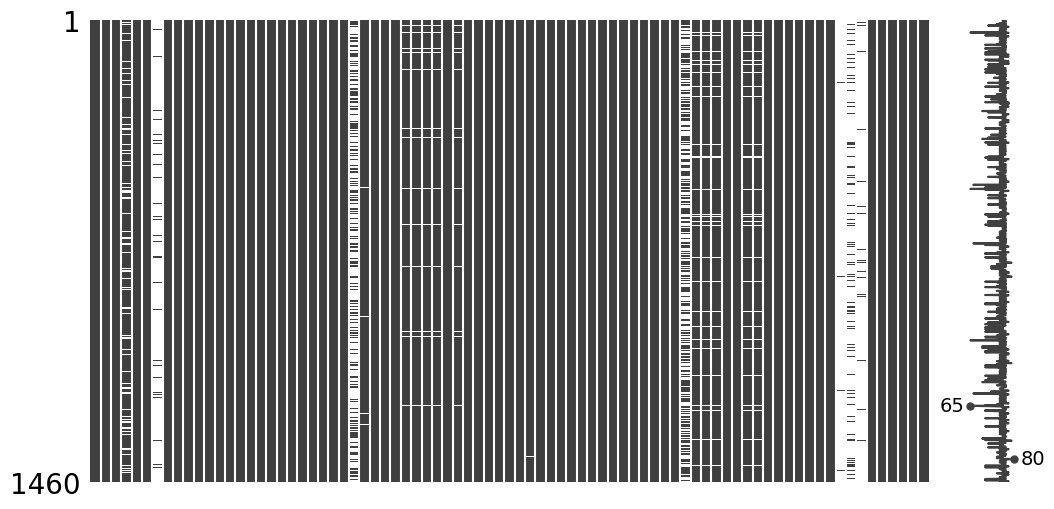

In [119]:
import missingno as msno
# Visualize missing values
msno.matrix(train_df, figsize=(12, 6))
# Visualize missing values in a heatmap

In [120]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [121]:
numeric_columns = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']
categorical_columns = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

print(f"This dataset have a {len(numeric_columns)} numeric columns,", end=" ")
print(f"and a {len(categorical_columns)} categorical columns")

This dataset have a 38 numeric columns, and a 43 categorical columns


In [122]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = train_df.select_dtypes(exclude=[np.number]).columns.tolist()


In [159]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Distribution of target variable

Text(0.05, 0.95, 'Skewness: 1.88')

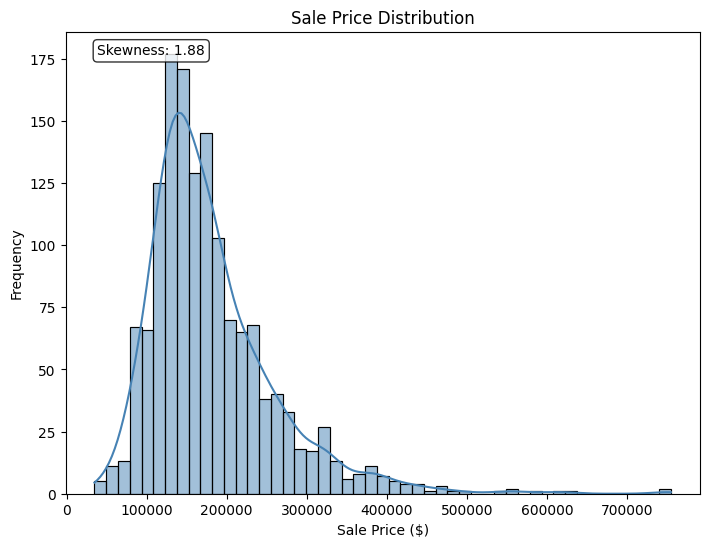

In [123]:
# Analyze the target variable
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, color='steelblue')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.annotate(f'Skewness: {train_df["SalePrice"].skew():.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

In [124]:
# Function to identify and visualize outliers in numerical features
def detect_outliers(df, column, threshold=3):
    """
    Detect outliers in a numeric column using z-score method
    
    Args:
        df: DataFrame containing the data
        column: Column name to analyze
        threshold: Z-score threshold (default 3)
        
    Returns:
        DataFrame with outlier rows
    """
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores > threshold)
    outliers = df[column].dropna()[filtered_entries]
    outlier_indices = outliers.index
    
    if len(outlier_indices) > 0:
        print(f"\nOutliers in {column} using z-score > {threshold}:")
        print(f"Number of outliers: {len(outlier_indices)}")
        print(f"Outlier indices: {outlier_indices.tolist()}")
        
        # Create scatter plot with SalePrice
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=column, y='SalePrice', alpha=0.5, color='steelblue')
        
        # Highlight outliers
        outlier_data = df.loc[outlier_indices]
        sns.scatterplot(data=outlier_data, x=column, y='SalePrice', color='red', s=100, label='Outliers')
        
        plt.title(f'{column} vs Sale Price with Outliers Highlighted')
        plt.xlabel(column)
        plt.ylabel('Sale Price ($)')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return df.loc[outlier_indices]
    else:
        print(f"No outliers found in {column} using z-score > {threshold}")
        return pd.DataFrame()

In [125]:
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

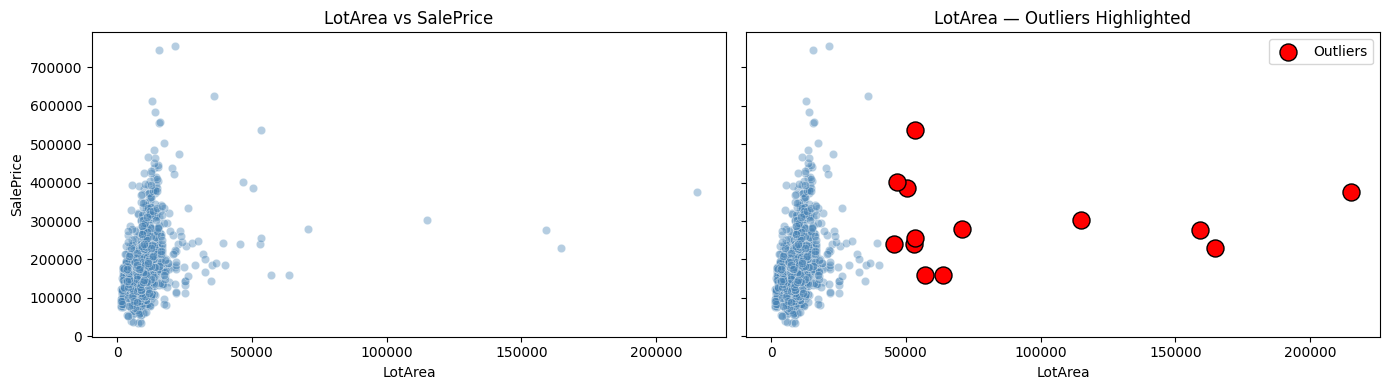

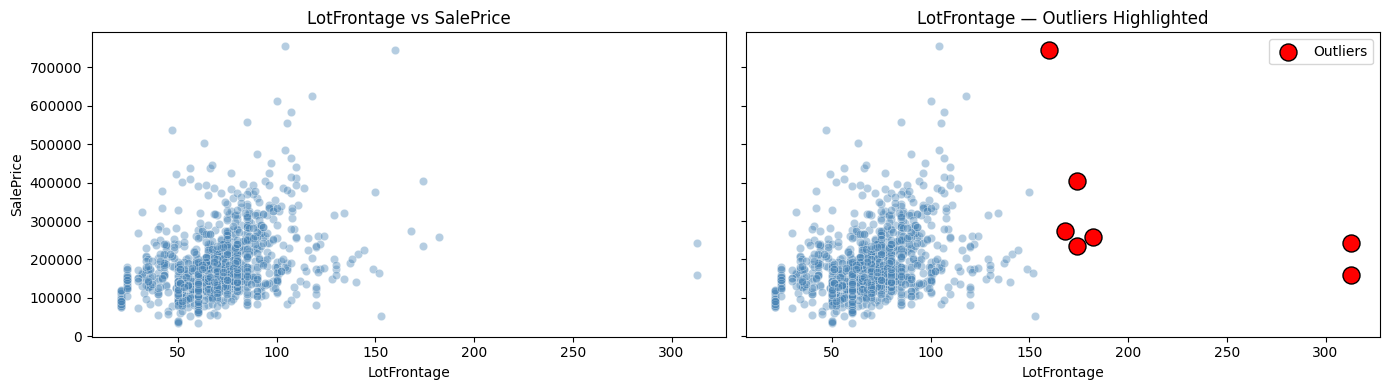

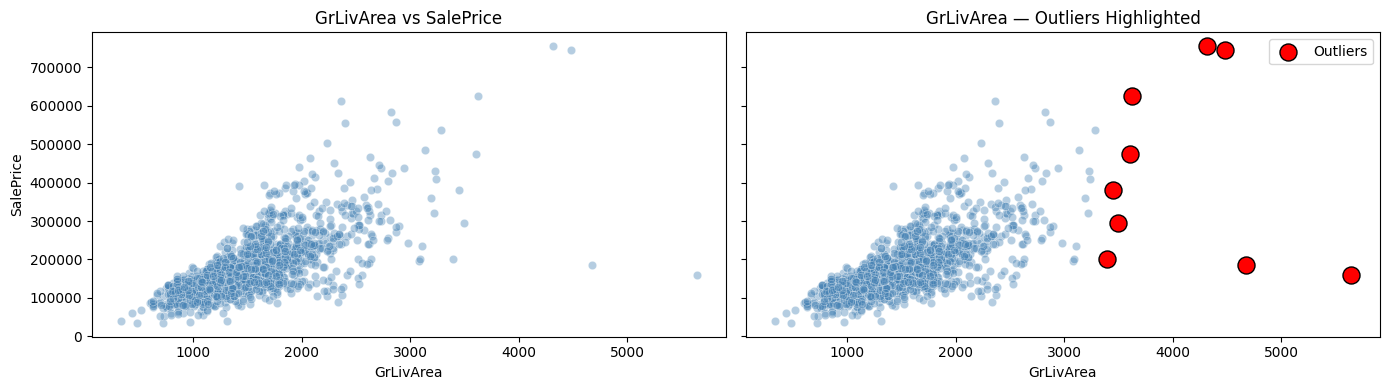

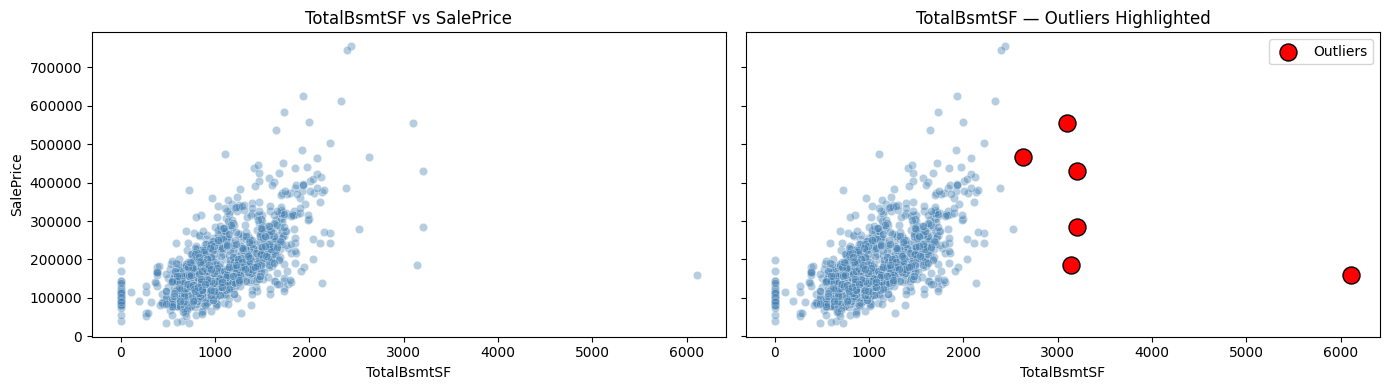

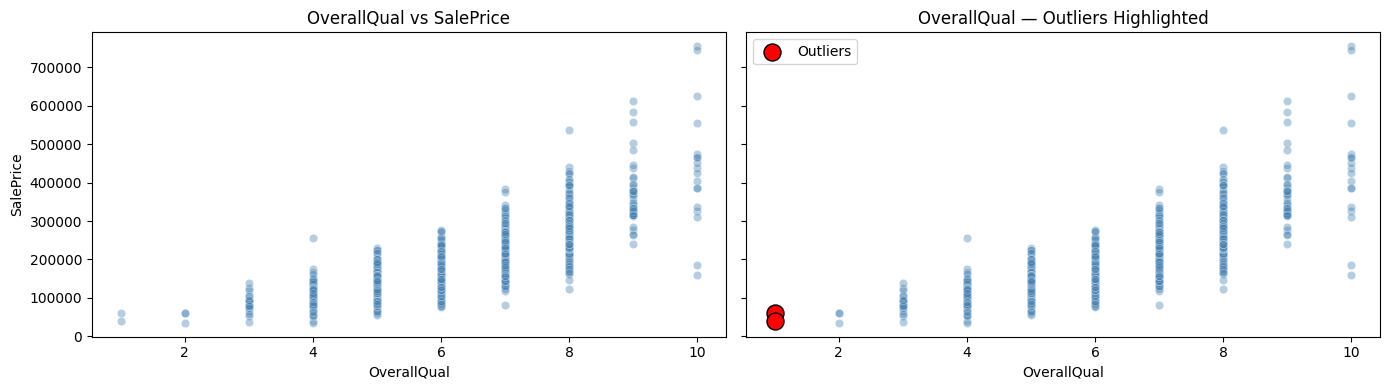

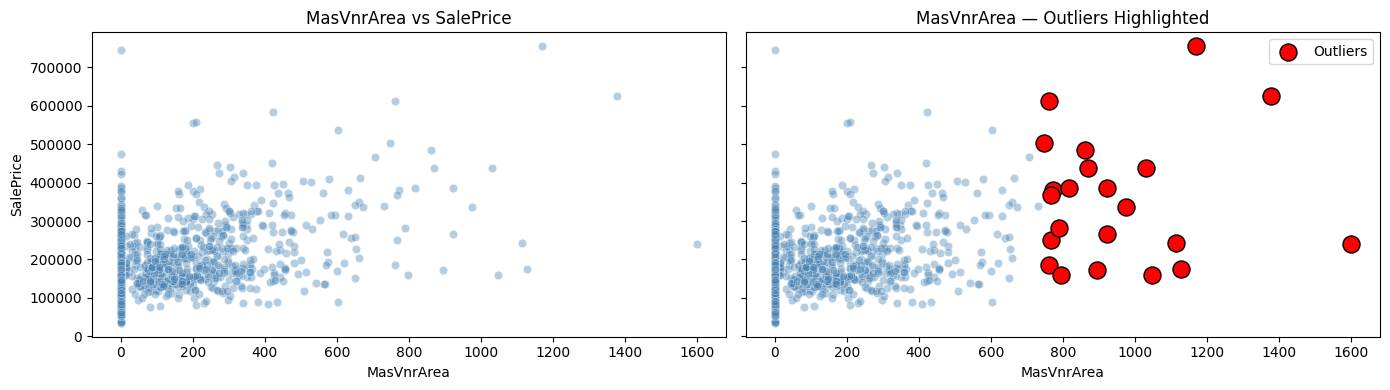

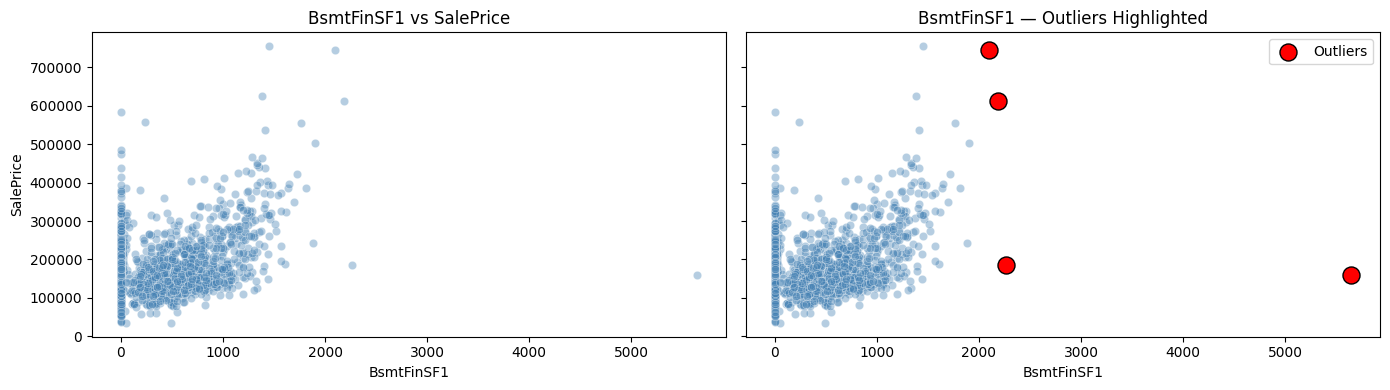

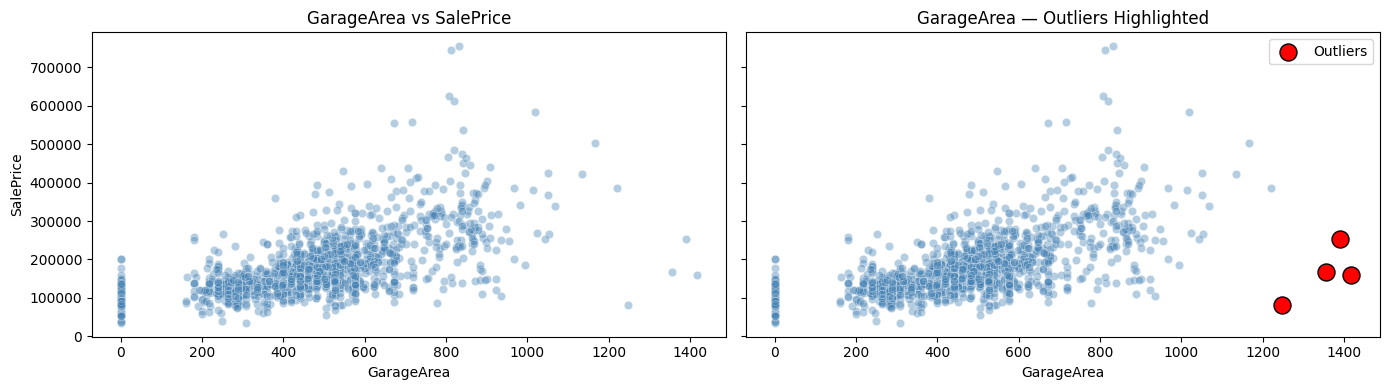

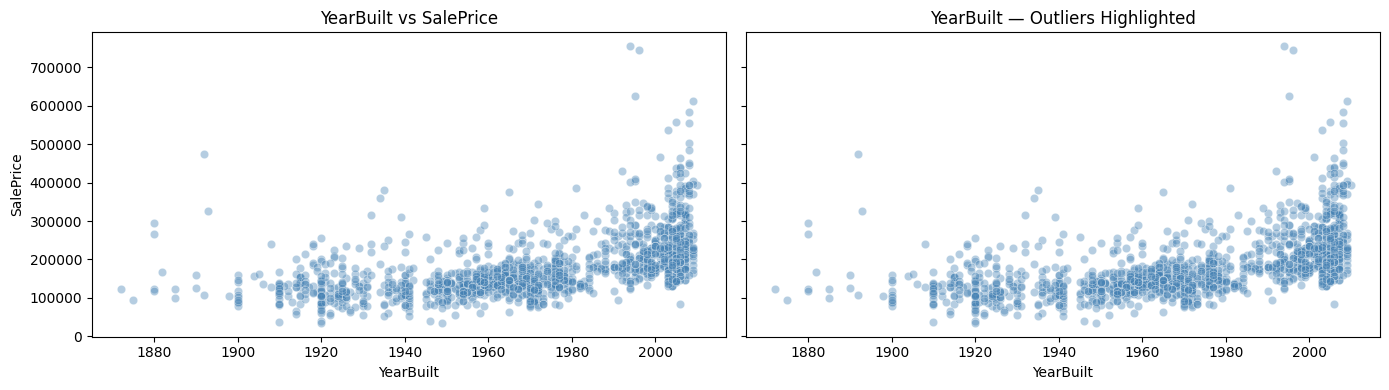

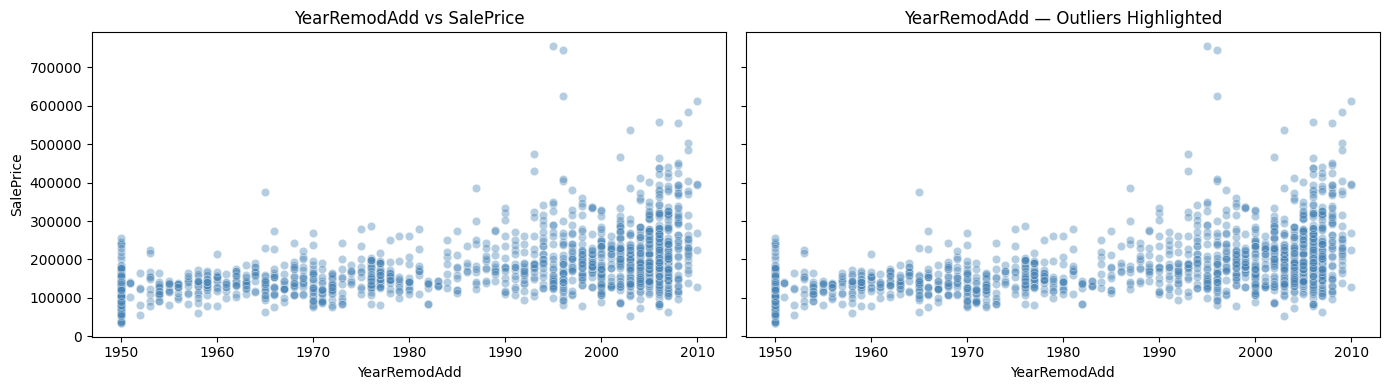

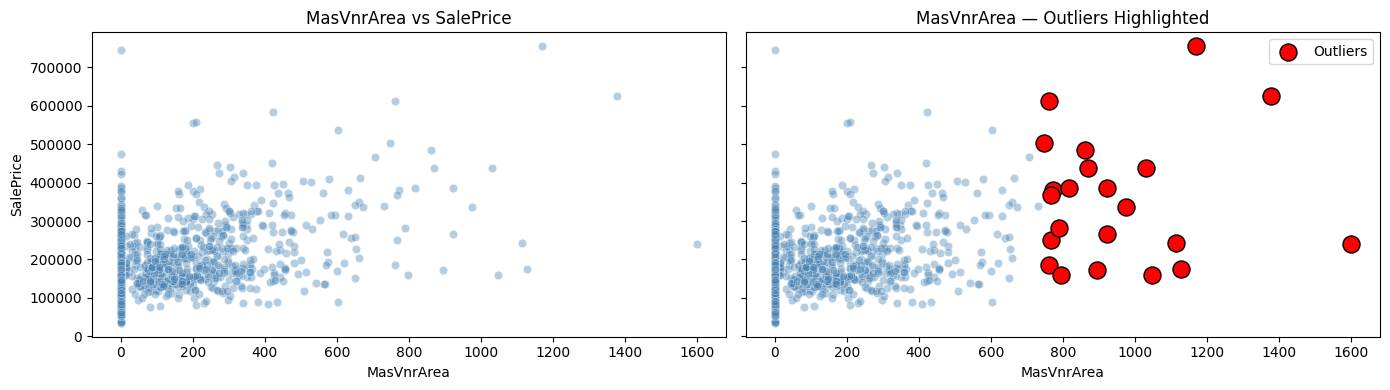

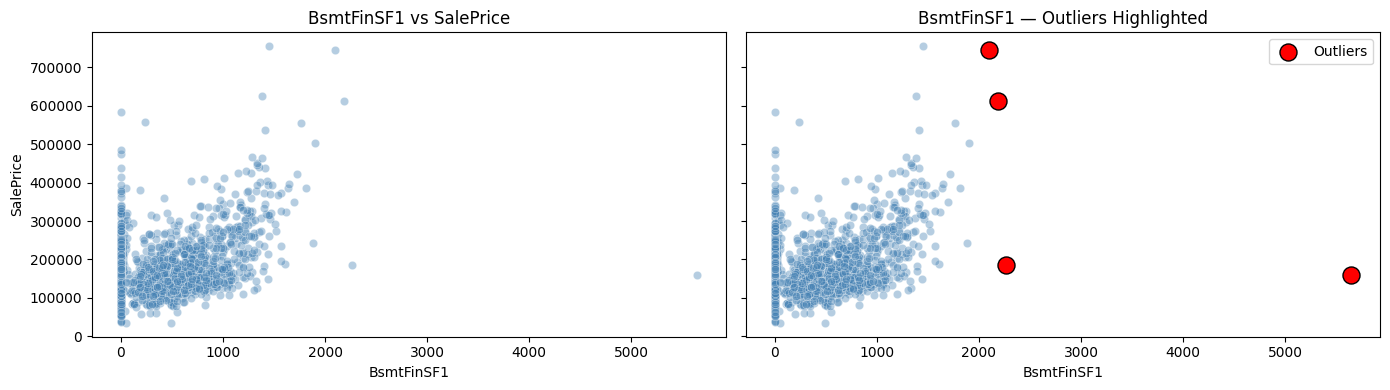

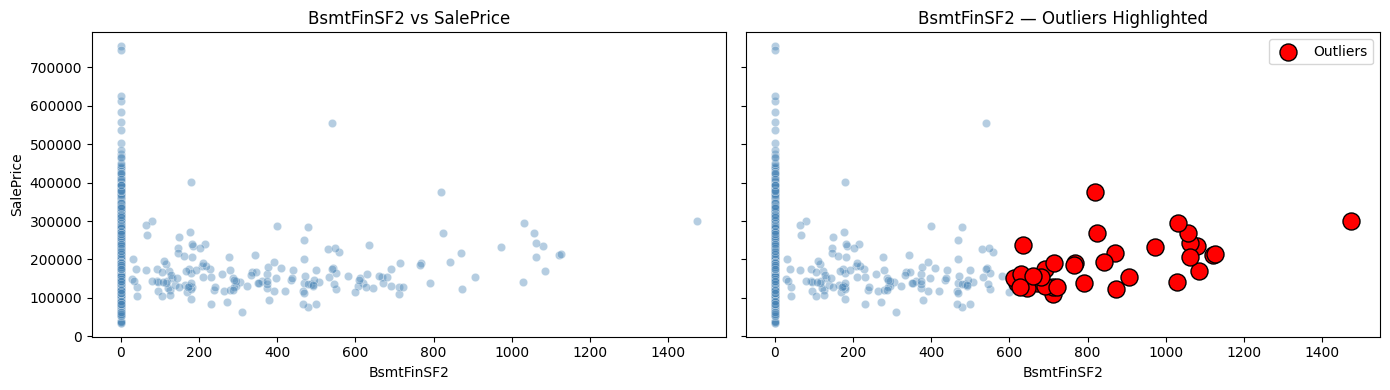

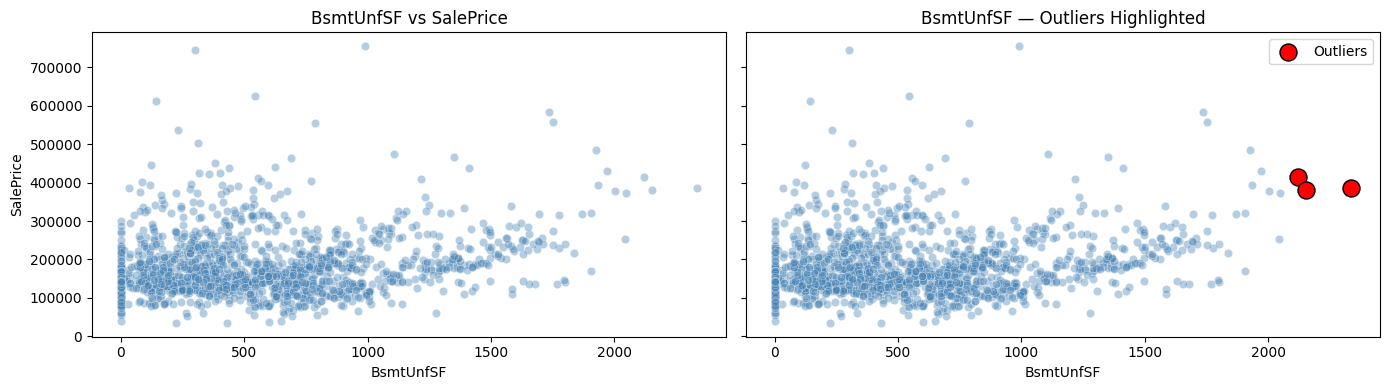

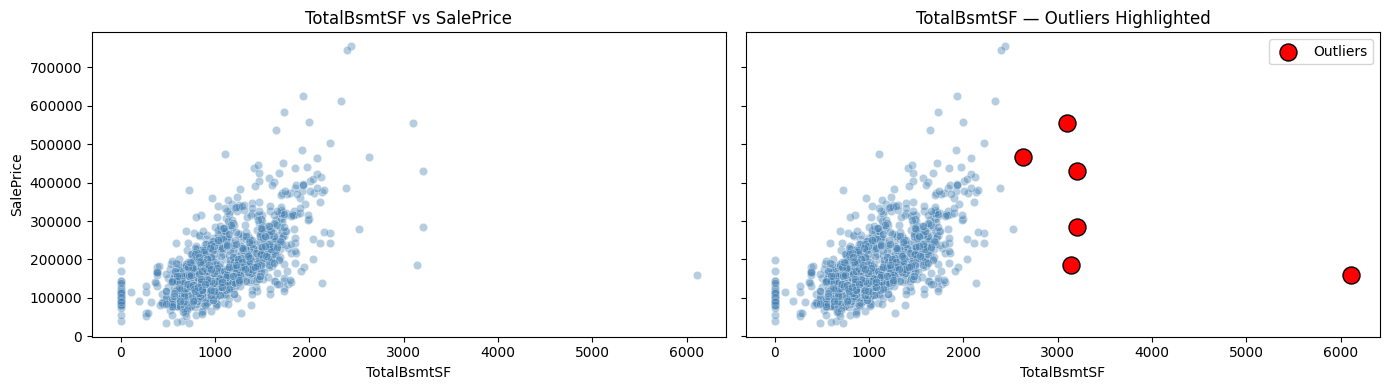

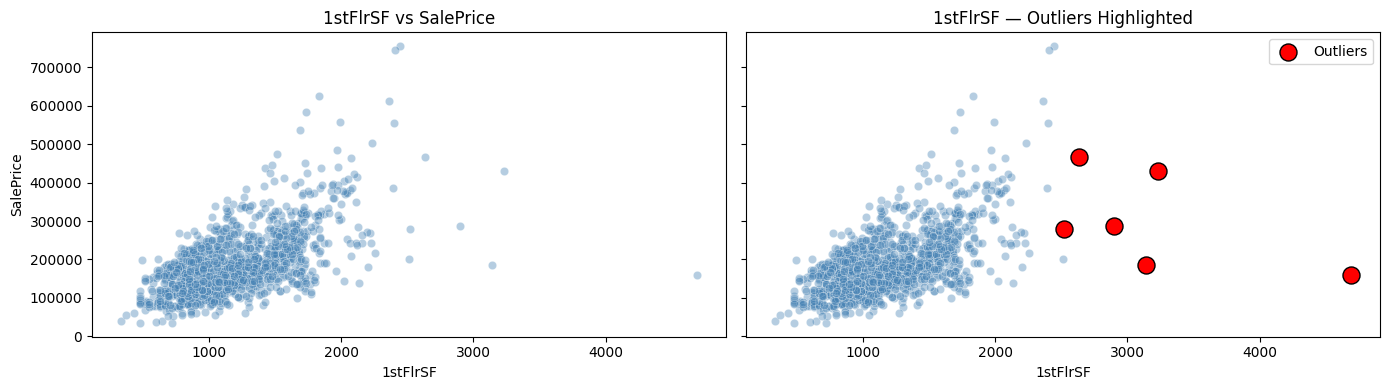

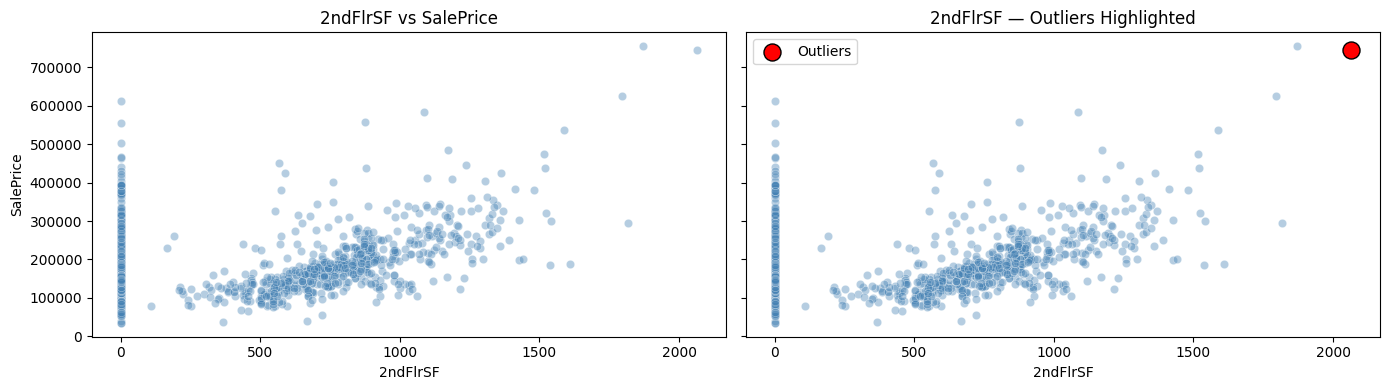

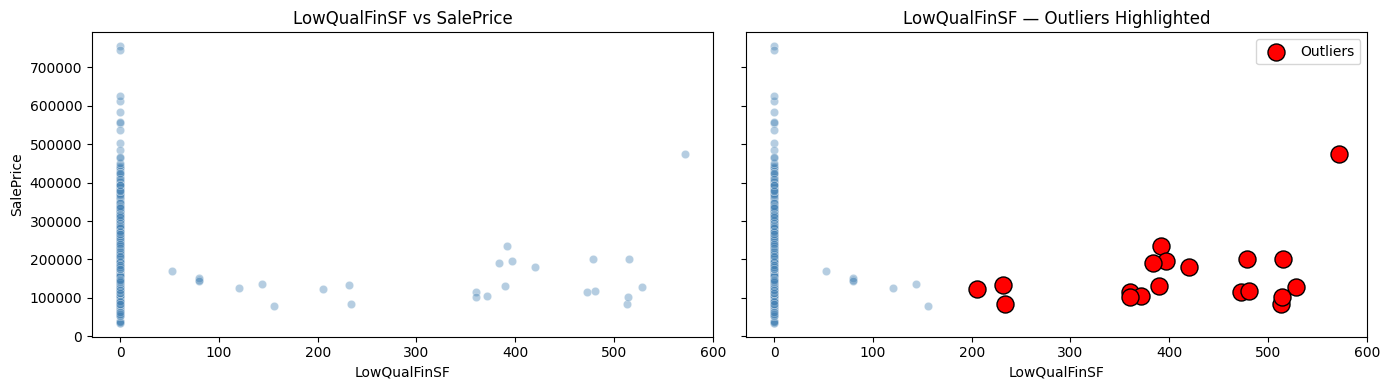

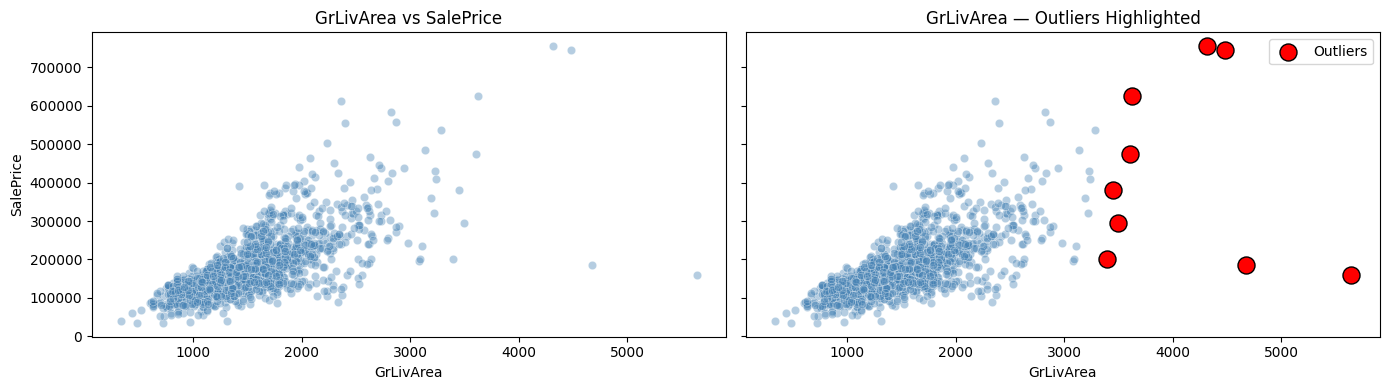

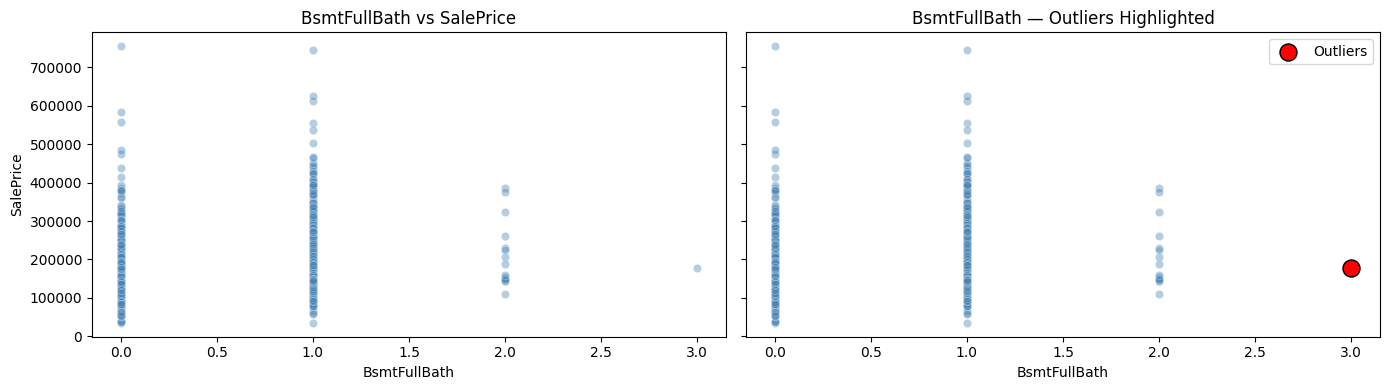

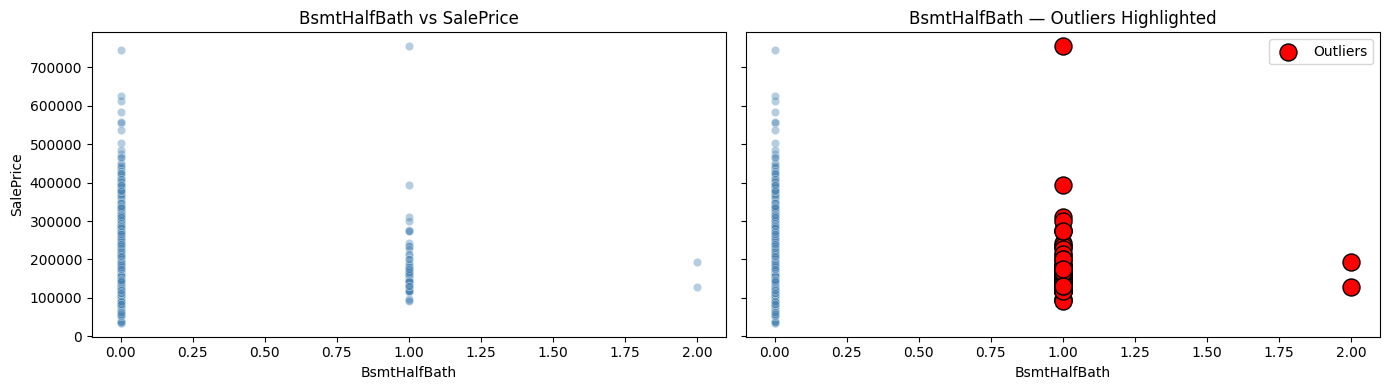

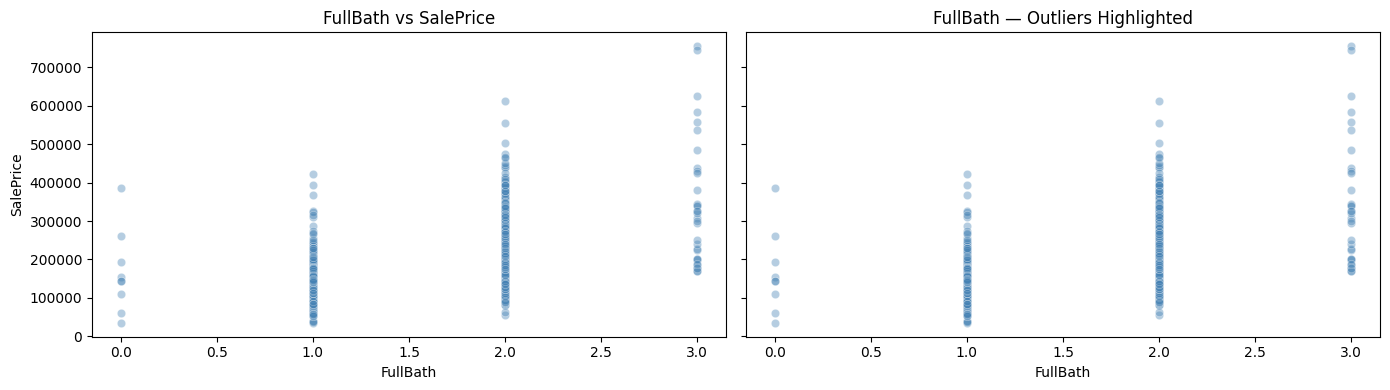

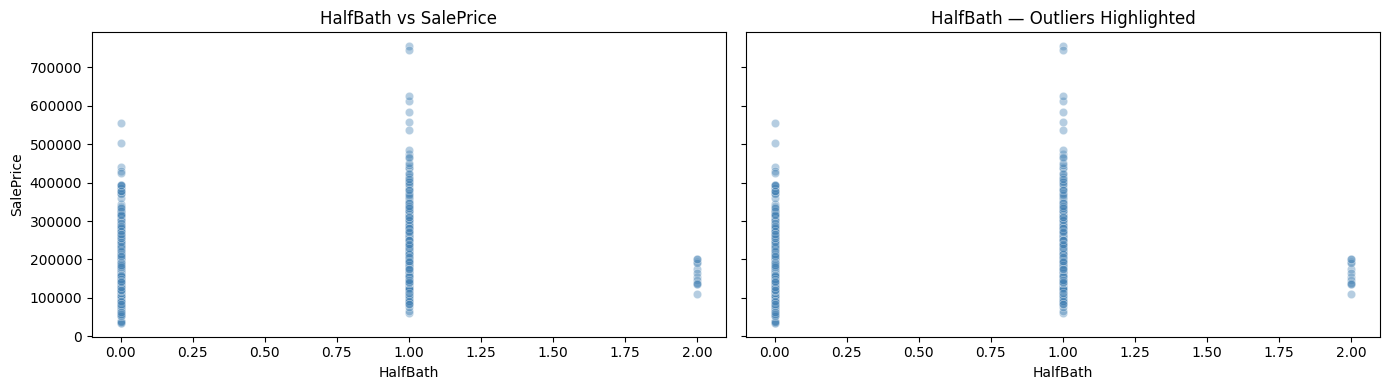

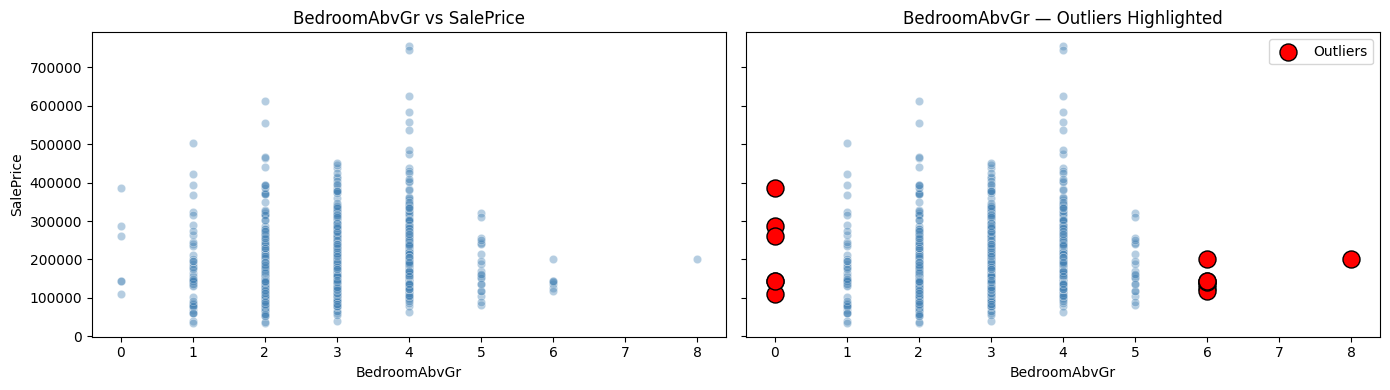

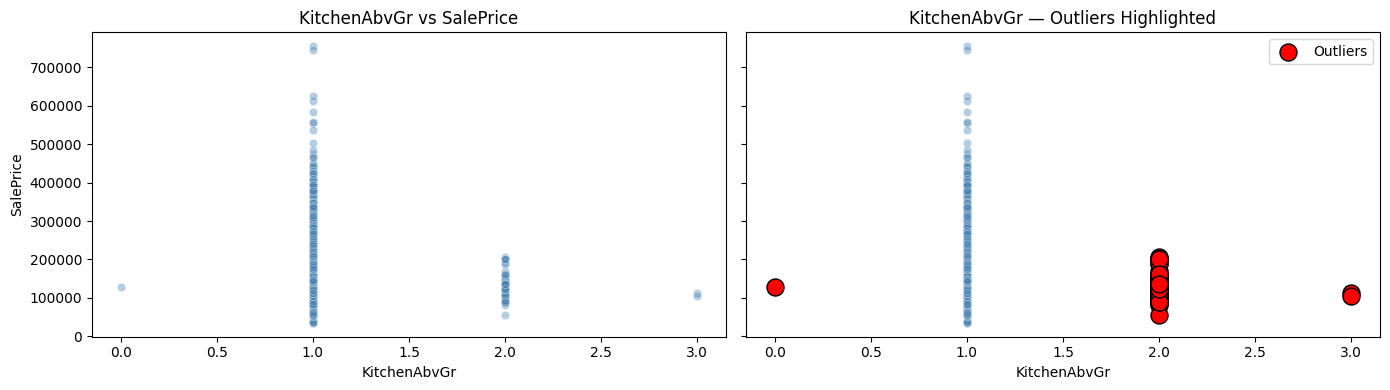

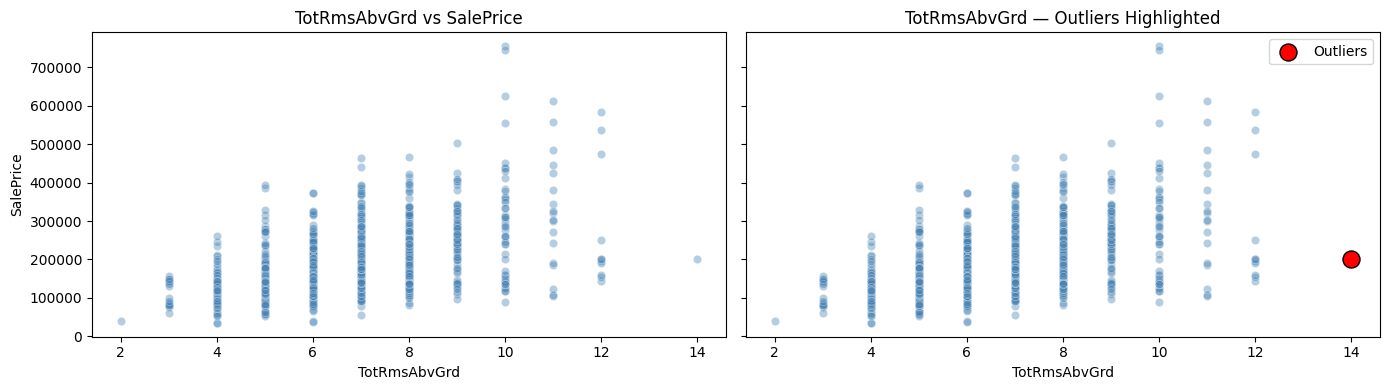

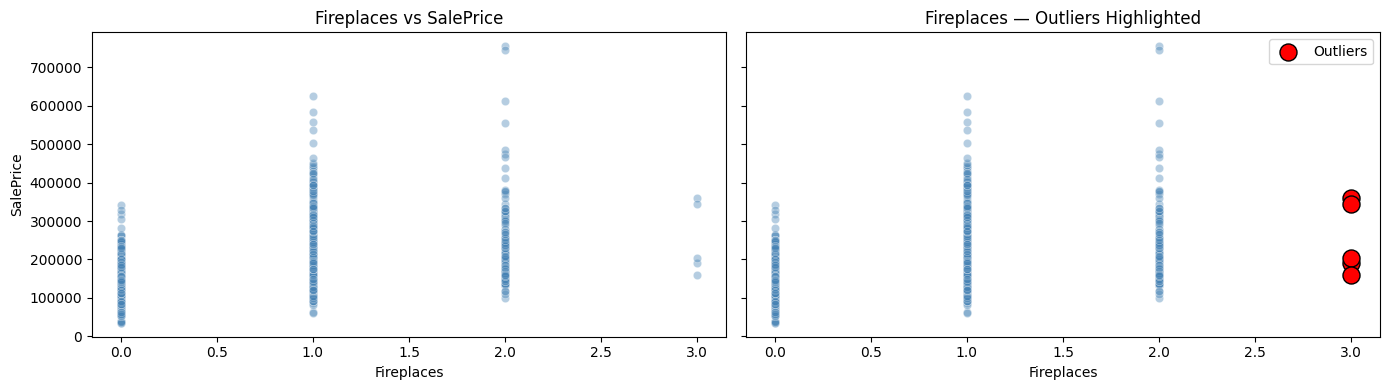

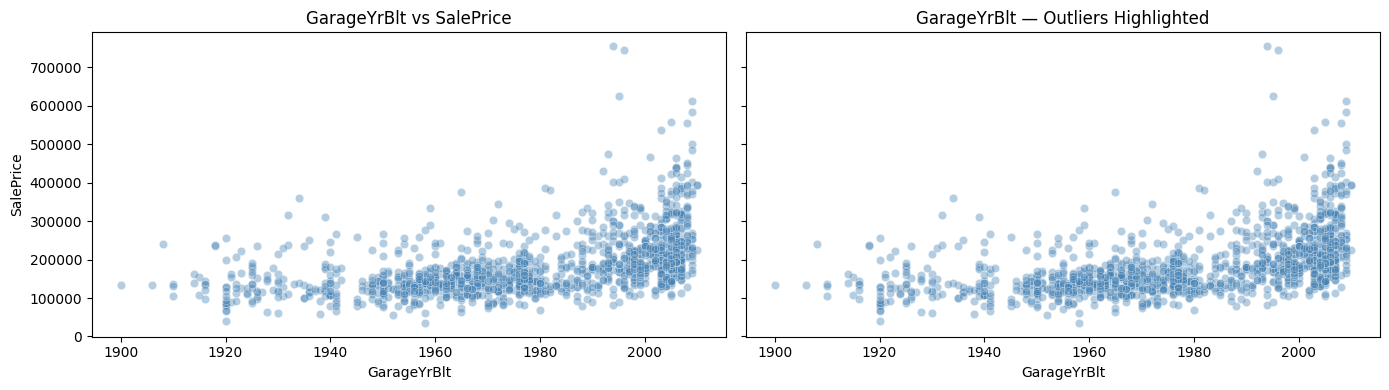

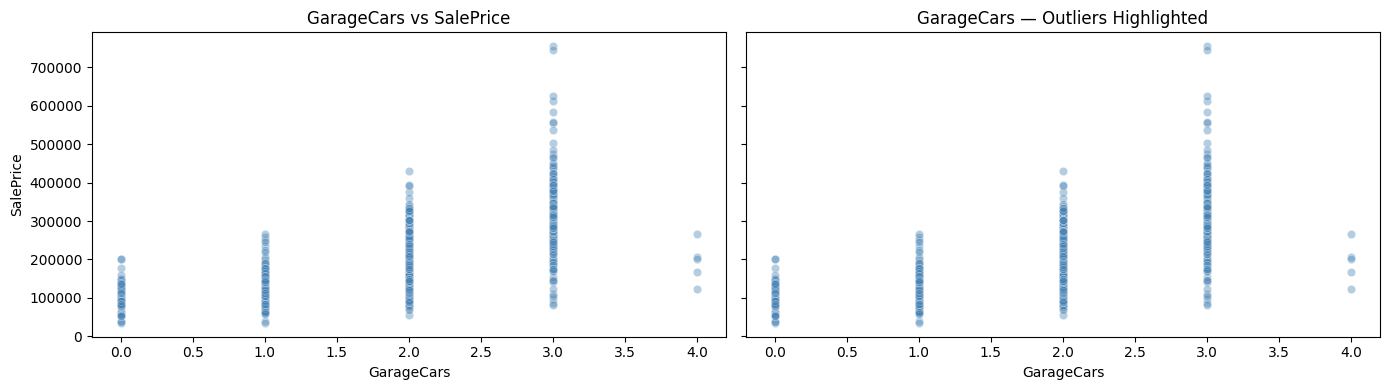

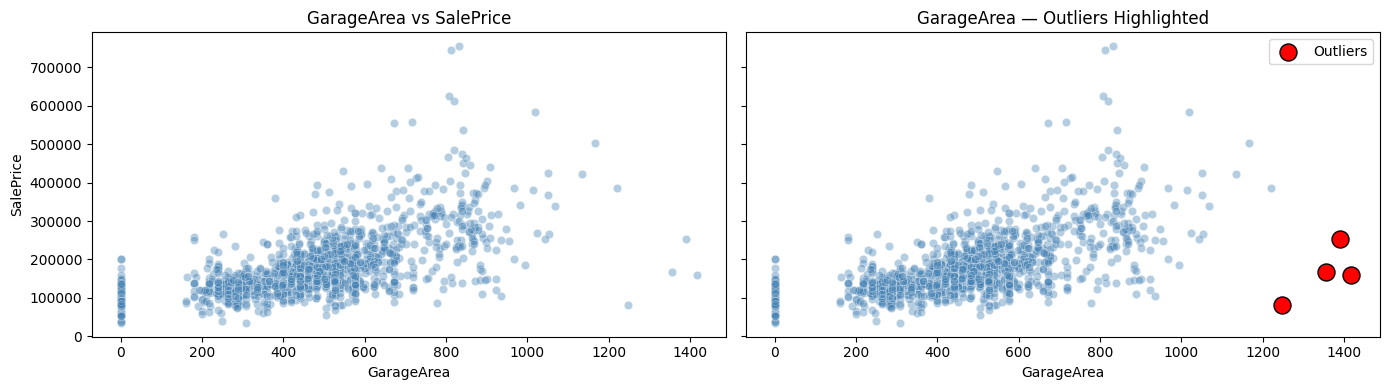

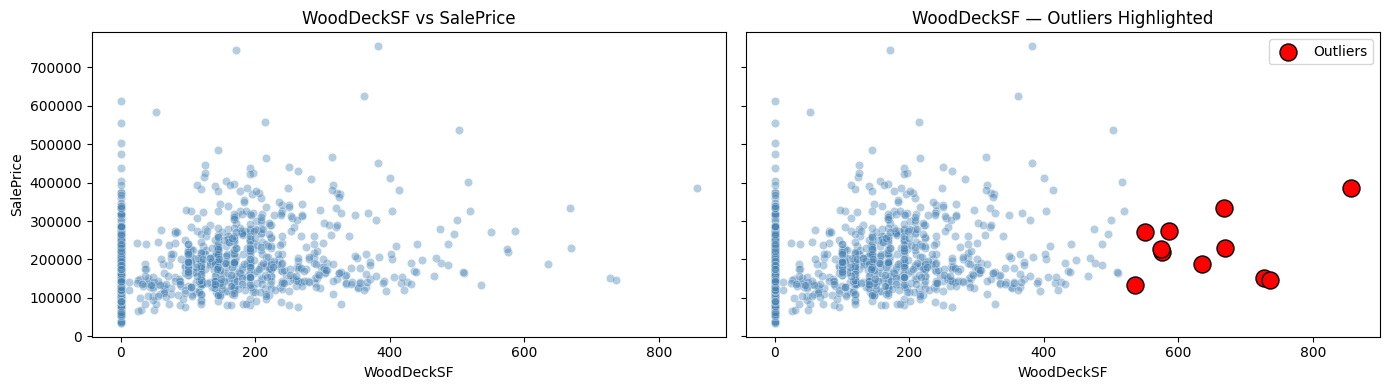

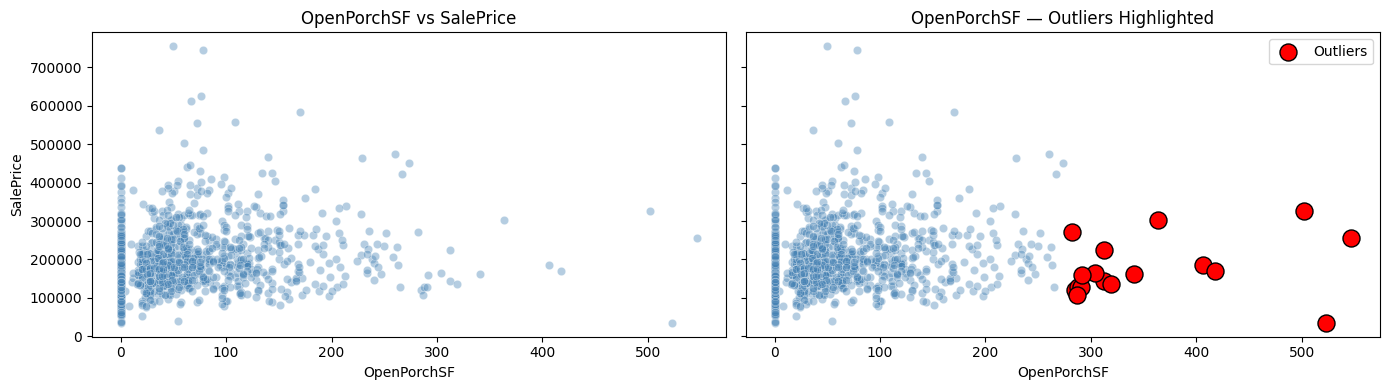

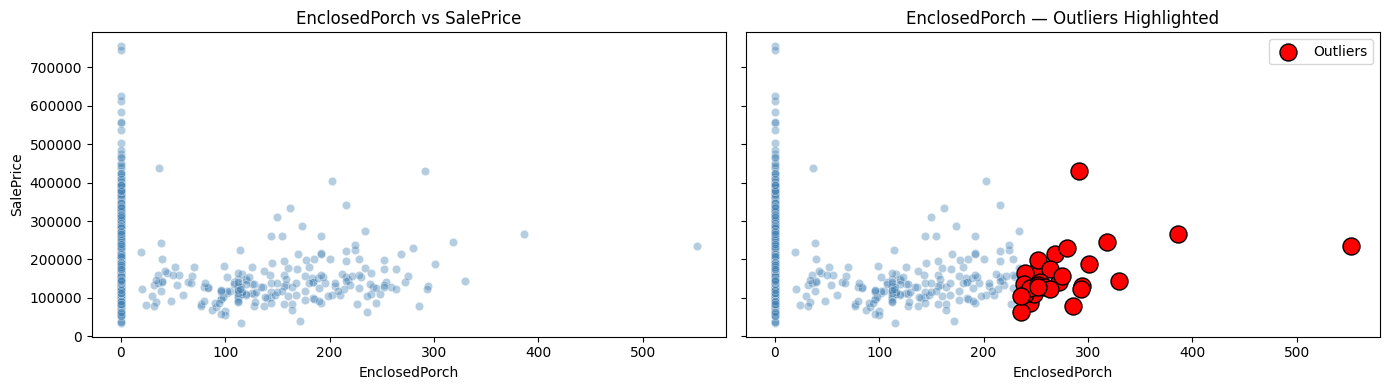

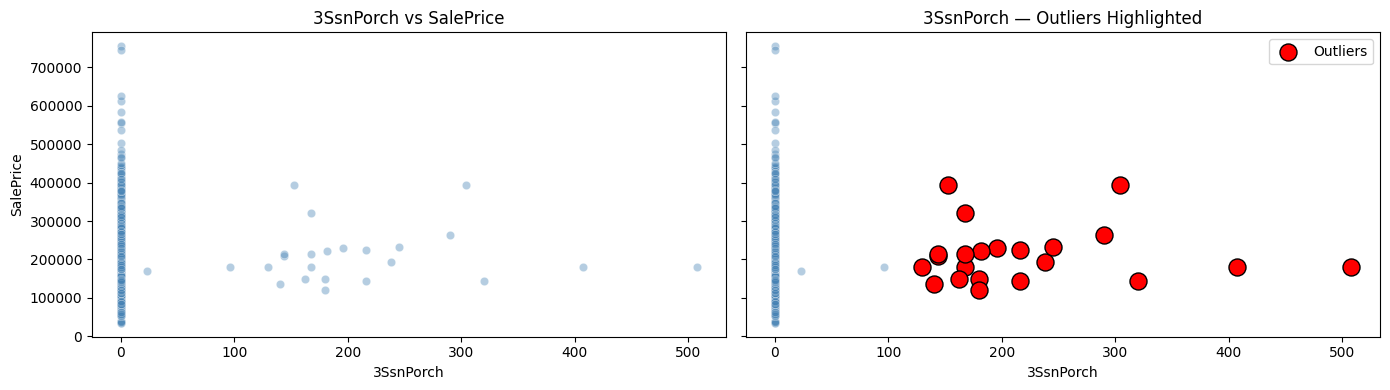

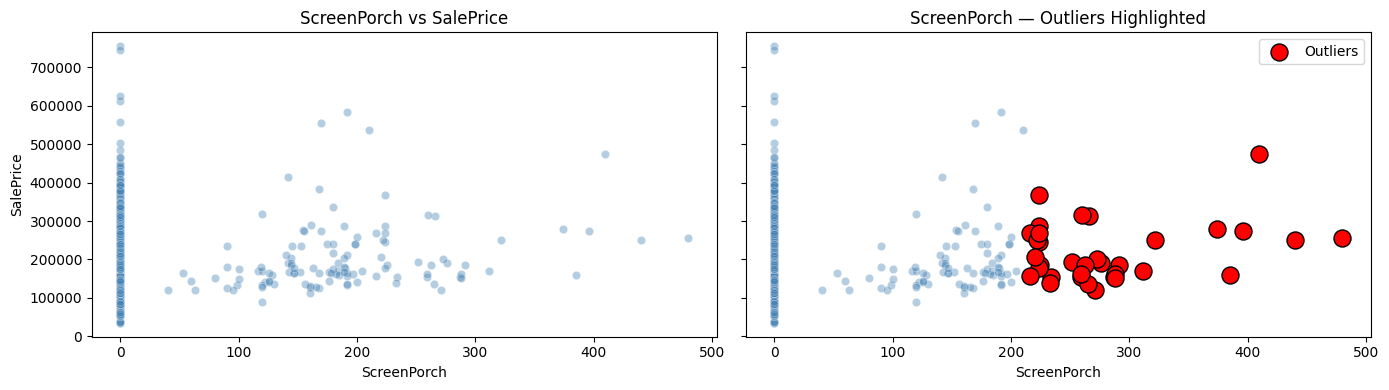

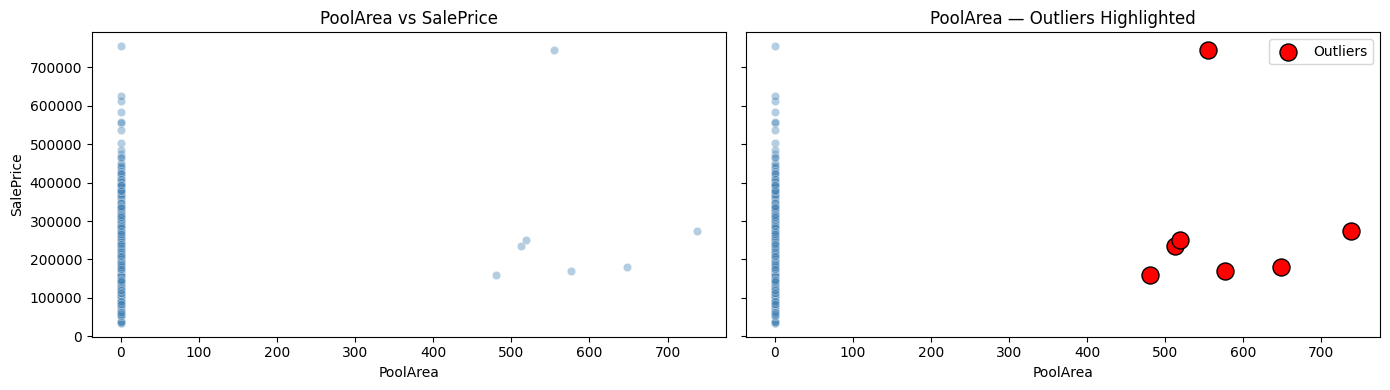

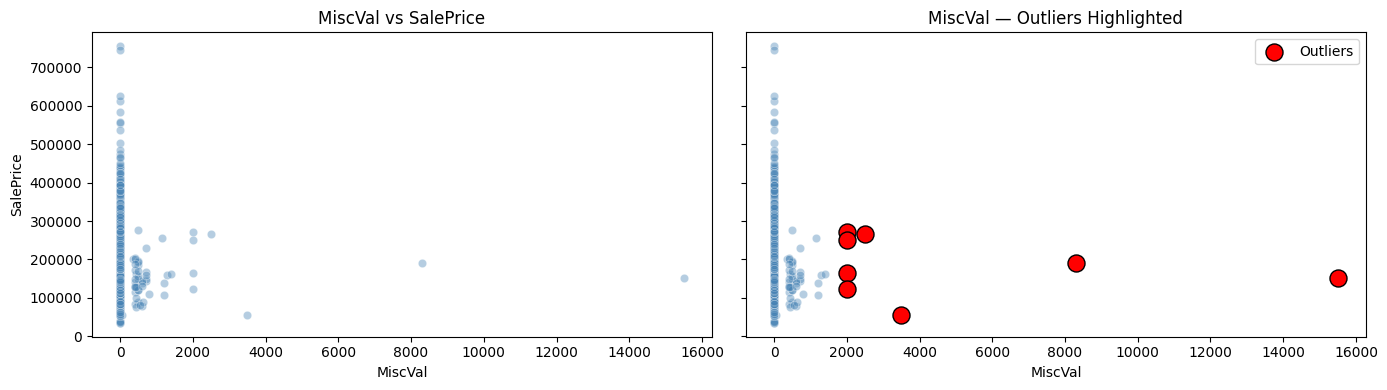

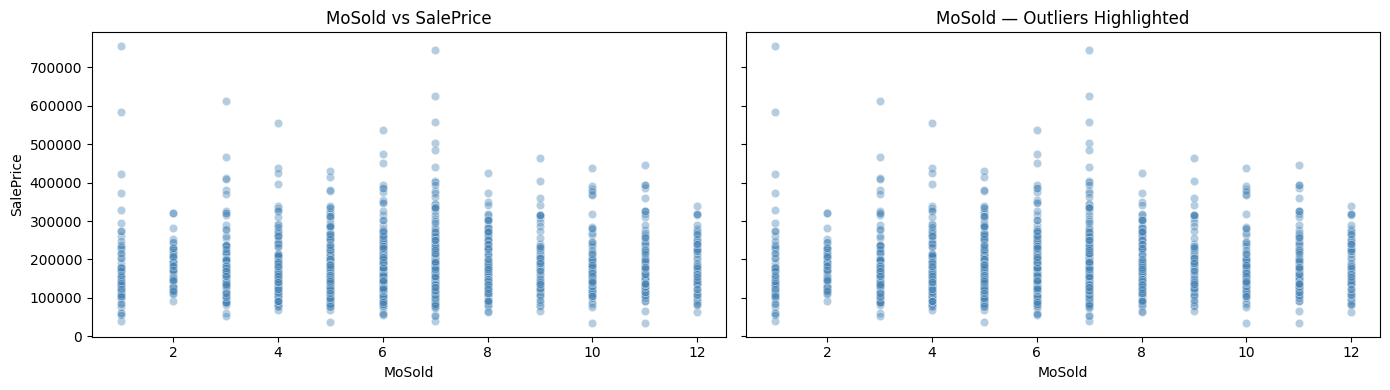

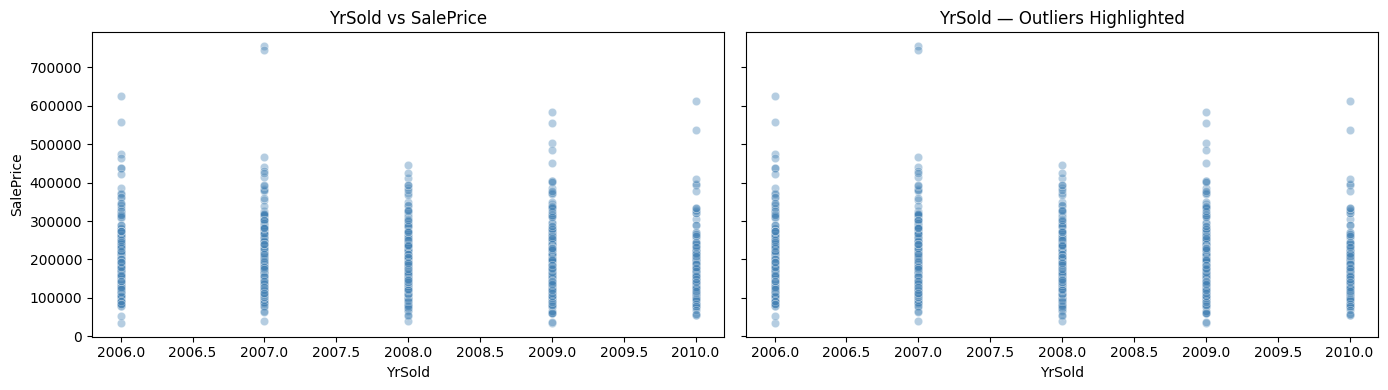

In [126]:
# Analysis of key numeric features for outliers
key_features = ['LotArea', 'LotFrontage', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'GarageArea',
                'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

all_outlier_ids = []

for feature in key_features:
    if feature not in train_df.columns:
        continue

    # Prepare df with feature, SalePrice, ID, dropping NaNs
    df_valid = train_df[[feature, 'SalePrice', 'Id']].dropna(subset=[feature])

    # Compute Z-scores and flag outliers
    df_valid['z_score'] = np.abs(stats.zscore(df_valid[feature]))
    outliers = df_valid[df_valid['z_score'] > 3.5]
    all_outlier_ids.extend(outliers['Id'].tolist())

    # 1×2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    # Left: all data
    sns.scatterplot(
        data=df_valid, x=feature, y='SalePrice',
        alpha=0.4, color='steelblue', ax=axes[0]
    )
    axes[0].set_title(f'{feature} vs SalePrice')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('SalePrice')

    # Right: highlight outliers
    sns.scatterplot(
        data=df_valid, x=feature, y='SalePrice',
        alpha=0.4, color='steelblue', ax=axes[1]
    )
    if not outliers.empty:
        axes[1].scatter(
            x=outliers[feature],
            y=outliers['SalePrice'],
            s=150,
            marker='o',
            color='red',
            edgecolor='black',
            label='Outliers'
        )
        axes[1].legend()

    axes[1].set_title(f'{feature} — Outliers Highlighted')
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

In [127]:
# Print unique outlier IDs at the end
unique_ids = sorted(set(all_outlier_ids))
print(f"\nTotal unique outlier IDs flagged: {len(unique_ids)}")
print("Outlier IDs:", unique_ids)


Total unique outlier IDs flagged: 346
Outlier IDs: [2, 4, 6, 9, 10, 18, 25, 27, 34, 38, 40, 42, 49, 51, 52, 53, 54, 56, 59, 65, 71, 73, 75, 79, 81, 89, 94, 103, 106, 114, 116, 117, 121, 126, 130, 138, 145, 154, 160, 166, 167, 170, 171, 177, 179, 183, 186, 188, 189, 190, 197, 198, 199, 202, 206, 214, 216, 219, 225, 232, 234, 238, 246, 247, 250, 252, 254, 259, 261, 264, 268, 272, 274, 279, 281, 290, 292, 298, 299, 300, 305, 310, 313, 314, 315, 323, 326, 329, 331, 333, 336, 340, 343, 347, 350, 353, 358, 359, 360, 368, 376, 381, 385, 401, 407, 415, 421, 422, 427, 441, 442, 447, 452, 455, 458, 460, 463, 471, 472, 478, 489, 496, 497, 500, 505, 506, 511, 518, 521, 524, 530, 534, 540, 543, 547, 549, 559, 571, 575, 577, 578, 581, 582, 584, 598, 600, 606, 612, 619, 626, 629, 631, 634, 635, 636, 638, 643, 646, 648, 654, 659, 661, 662, 663, 667, 677, 692, 698, 704, 705, 706, 707, 714, 718, 727, 729, 730, 736, 737, 739, 742, 744, 745, 746, 748, 756, 765, 770, 779, 785, 786, 799, 800, 808, 809, 810

### Feature Engineering

In [128]:
# Age-related features
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

# Area-related features
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

# Bathroom and porch features
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [129]:
# Treat specific variables with their missing values
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

In [130]:
# 1) List of categorical cols to inspect
cat_cols = [
    'MiscFeature',
    'Alley',
    'Fence',
    'MasVnrType',
    'FireplaceQu',
    'Electrical'
]

# Print unique values
for col in cat_cols:
    uniques = train_df[col].unique()
    print(f"{col!r} unique values: {uniques}\n")

'MiscFeature' unique values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']

'Alley' unique values: [nan 'Grvl' 'Pave']

'Fence' unique values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

'MasVnrType' unique values: ['BrkFace' nan 'Stone' 'BrkCmn']

'FireplaceQu' unique values: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

'Electrical' unique values: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']



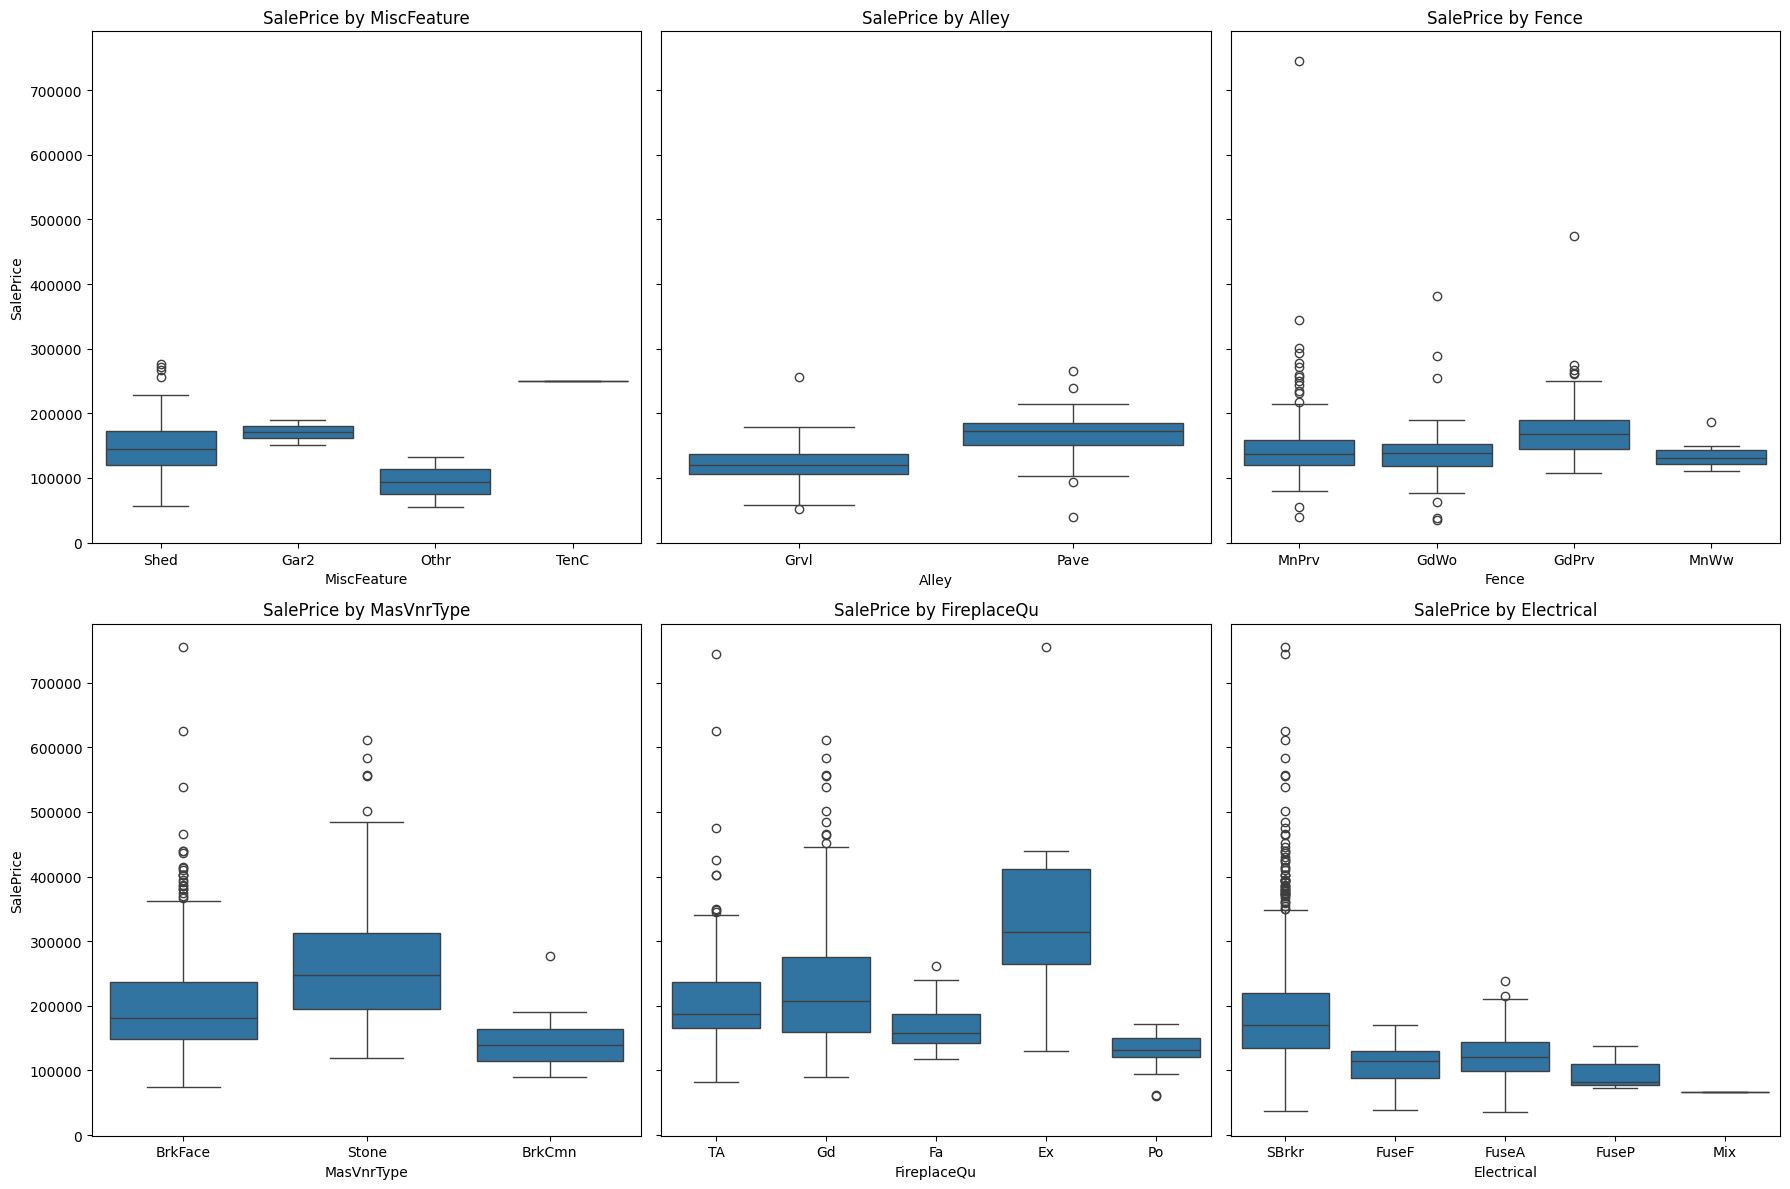

In [131]:
# 2) Boxplots of SalePrice by category
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    sns.boxplot(
        x=col,
        y='SalePrice',
        data=train_df,
        ax=ax
    )
    ax.set_title(f'SalePrice by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')

# Turn off any extra axes (if cat_cols length < grid size)
for extra_ax in axes[len(cat_cols):]:
    extra_ax.set_visible(False)

plt.tight_layout()
plt.show()


### Drop these columns

In [132]:
# Drop columns that were used to create new features
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                  'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                  'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 
                                  'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF',
                                  'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 
                                  'BsmtFinType2', 'GarageArea'])

test_id = test_df['Id'].copy()  # Save for later
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF',
                                'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 
                                'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF',
                                'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2',
                                'GarageArea'])

### Feature Distributions

<Axes: xlabel='SalePrice', ylabel='Count'>

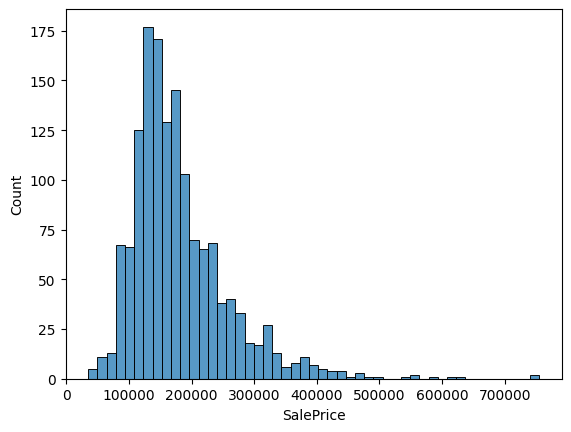

In [133]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

<Axes: xlabel='SalePrice', ylabel='Count'>

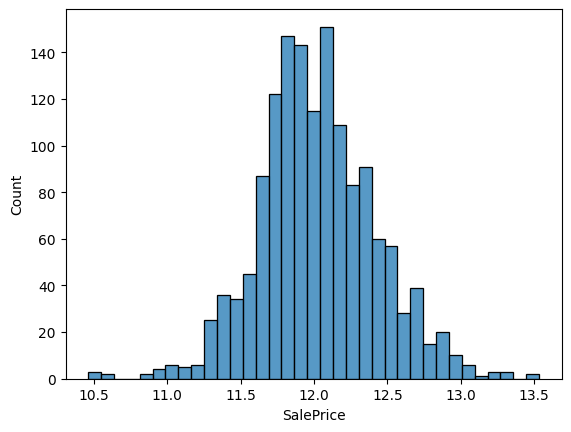

In [134]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [135]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

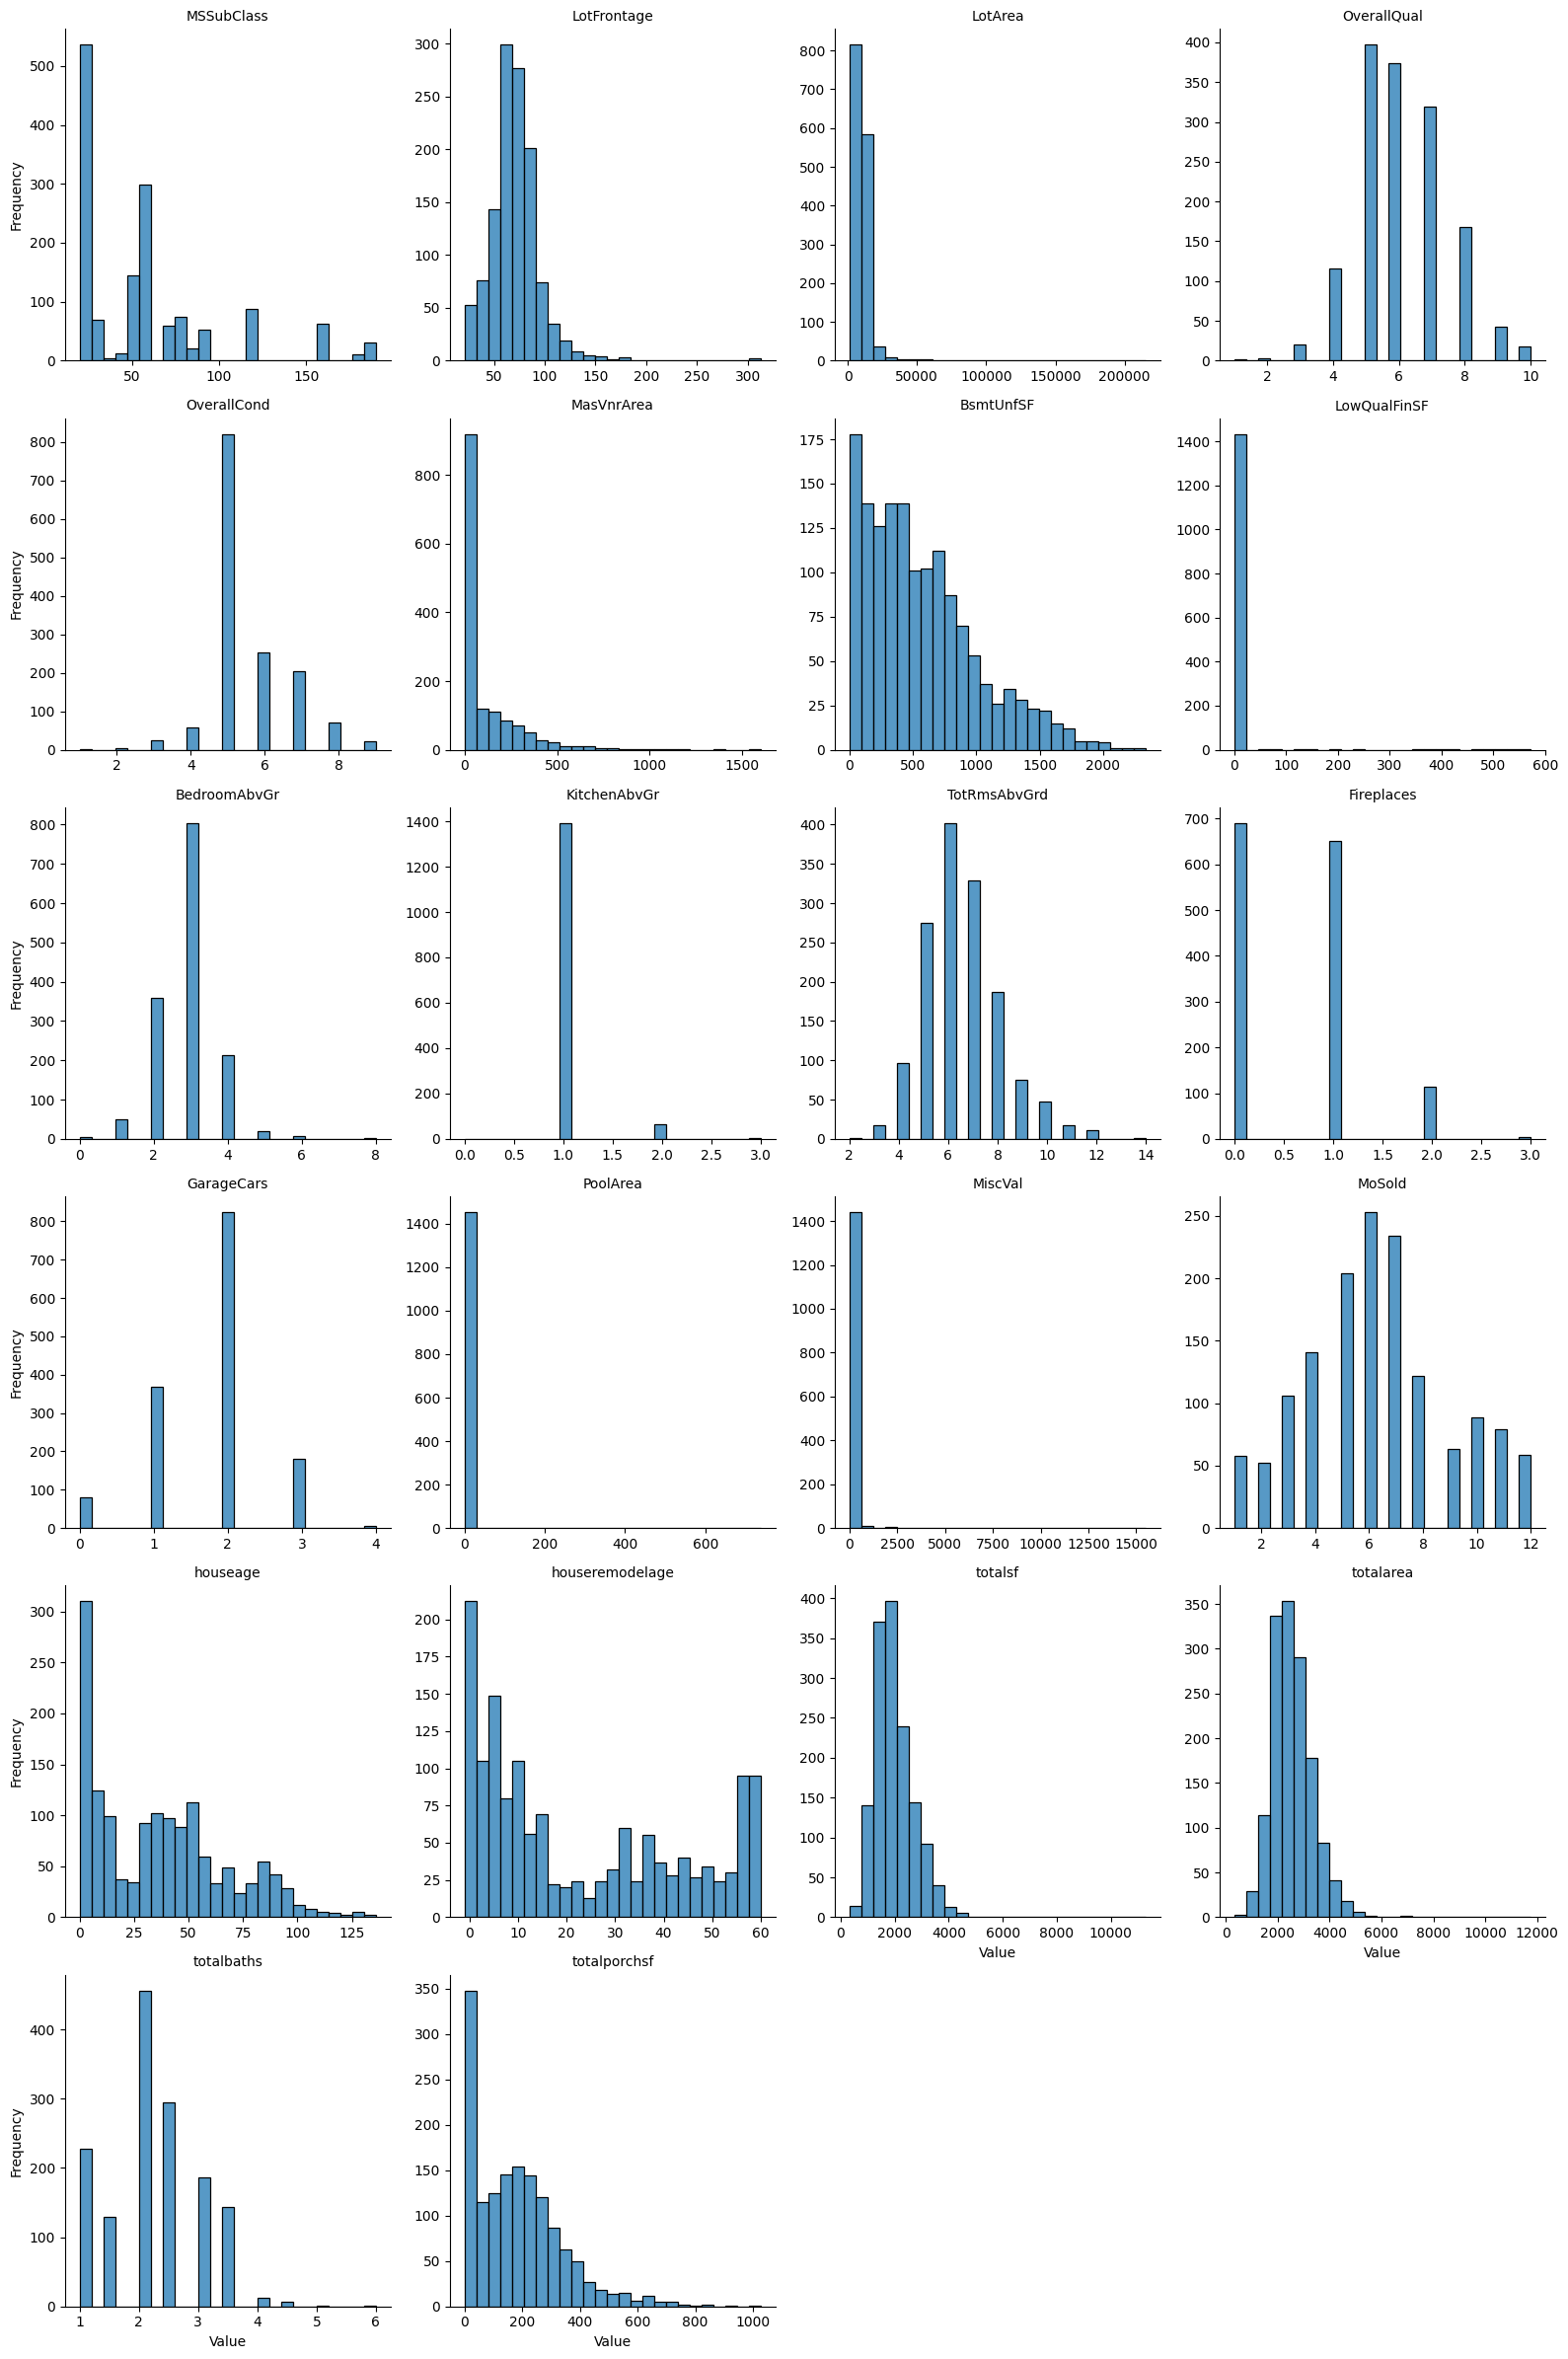

In [136]:
# Melt the DataFrame to long format
train_df_skew = train_df[num_cols].melt(var_name='Column', value_name='Value')

# Create a FacetGrid
g = sns.FacetGrid(train_df_skew, col='Column', col_wrap=4, sharex=False, sharey=False, height=4)

# Map the sns.histplot to each facet
g.map(sns.histplot, 'Value', bins=25)

# Add titles and labels
g.set_axis_labels('Value', 'Frequency')
g.set_titles(col_template='{col_name}')

plt.tight_layout()
plt.show()

In [137]:
# skewed_feats = train_df[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
# high_skew = skewed_feats[skewed_feats > 0.5]
# skew_cols = high_skew.index.tolist()
# print(f"\nNumber of highly skewed numerical features: {len(skew_cols)}")

In [138]:
# high_skew = pd.DataFrame(high_skew).reset_index()
# high_skew.columns = ['Feature', 'Skewness']
# high_skew

In [139]:
# # Define features we right skew
# skewed_features = ['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', 'KitchenAbvGr', 'MasVnrArea', 'totalsf', 'LotFrontage', 'totalarea', 
# 'MSSubClass', 'totalporchsf', 'BsmtUnfSF', 'OverallCond', 'TotRmsAbvGrd', 'Fireplaces', 'houseage', 'houseremodelage']

# # Define function to apply log transform
# def log_of_feature(data_df, skewed_features):
#     data = data_df.copy()
#     for feature in skewed_features:
#         data[feature] = np.sqrt(data[feature])
#     return data

# # Apply the function to X_train
# train_df_log = log_of_feature(train_df, skewed_features)

In [140]:
# melted_X_train = train_df_log[num_cols].melt(var_name='Column', value_name='Value')
# g = sns.FacetGrid(melted_X_train, col='Column', col_wrap=4, sharex=False, sharey=False, height=4)
# g.map(sns.histplot, 'Value', bins=25)
# g.set_axis_labels('Value', 'Frequency')
# g.set_titles(col_template='{col_name}')
# plt.tight_layout()
# plt.show()

### Encoding

In [141]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir', 
            'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 
            'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [142]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
            'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning',
            'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [143]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [144]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_preprocessed = pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

## build models

In [145]:
# 1) Reinstantiate your tuned models:
models = {
    'LinearReg':   LinearRegression(),
    'RandomForest':RandomForestRegressor(
                        n_estimators=500,
                        max_depth=15,
                        min_samples_split=3,
                        random_state=13
                    ),
    'XGBoost':     XGBRegressor(
                        random_state=13,
                        learning_rate=0.1,    # use your best_lr
                        n_estimators=300,     # your best_n
                        max_depth=3,
                        min_child_weight=1,   # etc.
                        gamma=0.1,
                        subsample=0.9,
                        colsample_bytree=0.9
                    ),
    'Ridge':       Ridge(alpha=1),    # fill in with your best alpha
    'GBR':         GradientBoostingRegressor(
                        n_estimators=300,
                        max_depth=15,
                        min_samples_leaf=10,
                        learning_rate=0.01,
                        max_features=0.7,
                        random_state=13
                    ),
    'LGBM':        lgb.LGBMRegressor(
                        boosting_type='gbdt',
                        num_leaves=30,
                        learning_rate=0.05,
                        n_estimators=200,
                        random_state=13
                    ),
    'CatBoost':    CatBoostRegressor(
                        iterations=500,
                        depth=6,
                        learning_rate=0.05,
                        loss_function='RMSE',
                        verbose=False,
                        random_state=13
                    )
}


In [146]:
# 5-fold CV set-up
kf = KFold(n_splits=5, shuffle=True, random_state=13)

# 3) Compute per‐fold RMSE for each model
cv_scores = {}
for name, model in models.items():
    # note: using neg_root_mean_squared_error so we flip sign
    scores = cross_val_score(
        model,
        X_train, y_train,
        cv=kf,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    cv_scores[name] = -scores

# 4) Build DataFrame of scores
cv_scores_df = pd.DataFrame(cv_scores)

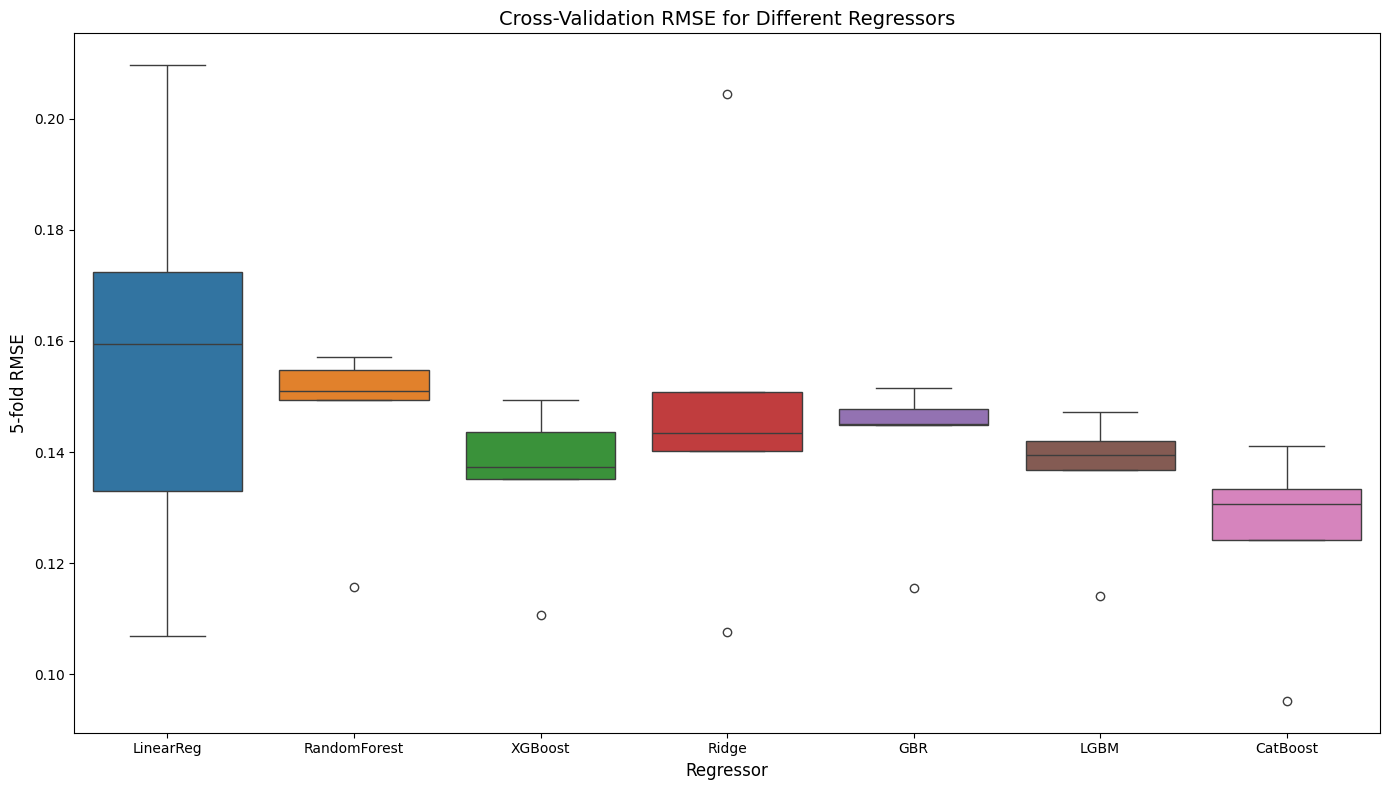

In [147]:
# Boxplot of the CV RMSEs
plt.figure(figsize=(14, 8))
sns.boxplot(data=cv_scores_df)
plt.xlabel('Regressor', fontsize=12)
plt.ylabel('5-fold RMSE', fontsize=12)
plt.title('Cross-Validation RMSE for Different Regressors', fontsize=14)
plt.tight_layout()
plt.show()

In [148]:
from sklearn.model_selection import cross_validate

# Define the metrics you want
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE':  'neg_mean_absolute_error',
    'R2':   'r2'
}

# Run cross_validate for each model
records = []
for name, model in models.items():
    cvres = cross_validate(
        model, X_train, y_train,
        cv=kf,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )
    records.append({
        'Model': name,
        'Mean_RMSE':   -cvres['test_RMSE'].mean(),
        'Std_RMSE':     cvres['test_RMSE'].std(),
        'Mean_MAE':    -cvres['test_MAE'].mean(),
        'Std_MAE':      cvres['test_MAE'].std(),
        'Mean_R2':      cvres['test_R2'].mean(),
        'Std_R2':       cvres['test_R2'].std()
    })

# Build summary DataFrame
summary = pd.DataFrame(records).set_index('Model').sort_values('Mean_RMSE', ascending=False)
print("\nSummary of CV performance (lower RMSE/MAE is better; higher R2 is better):")
display(summary)


Summary of CV performance (lower RMSE/MAE is better; higher R2 is better):


,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_R2,Std_R2
Model,,,,,,
LinearReg,0.156236,0.034928,0.091412,0.006414,0.840829,0.056458
Ridge,0.149275,0.031270,0.091917,0.006691,0.855177,0.049763
RandomForest,0.145583,0.015197,0.098459,0.008218,0.863560,0.022902
GBR,0.140909,0.012919,0.093294,0.006253,0.872290,0.019044
LGBM,0.135918,0.011456,0.090306,0.005955,0.881390,0.015041
CatBoost,0.124939,0.015806,0.082689,0.006828,0.899137,0.021593
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN


## Top 5 models

In [149]:
# 1) Top-5 models to tune
tune_models = {
    'Ridge':   Ridge(random_state=13),
    'GBR':     GradientBoostingRegressor(random_state=13),
    'XGBoost': XGBRegressor(random_state=13, verbosity=0),
    'LGBM':    lgb.LGBMRegressor(random_state=13),
    'CatBoost':CatBoostRegressor(loss_function='RMSE', verbose=False, random_state=13)
}

## Hyperparameter Turning

In [150]:
# Hyper-parameter grids
param_grids = {
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 5, 10, 20]
    },
    'GBR': {
        'n_estimators': [200, 500, 800],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 8],
        'min_samples_leaf': [5, 10, 20]
    },
    'XGBoost': {
        'n_estimators': [300, 500],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
    },
    'LGBM': {
        'n_estimators': [200, 400],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 30, 50],
        'subsample': [0.7, 0.9, 1.0]
    },
    'CatBoost': {
        'iterations': [300, 500],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

In [151]:
from sklearn.model_selection import GridSearchCV
# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=13)
tuned_scores = []

for name, model in tune_models.items():
    print(f"Tuning {name}...")
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=kf,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    gs.fit(X_train, y_train)
    best_rmse = -gs.best_score_
    tuned_scores.append({
        'Model': name,
        'Best_RMSE': best_rmse,
        **{f"{k}": v for k, v in gs.best_params_.items()}
    })
    # Replace the entry with the best_estimator_ for final use
    tune_models[name] = gs.best_estimator_

Tuning Ridge...
Tuning GBR...
Tuning XGBoost...
Tuning LGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1997
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 114
[LightGBM] [Info] Start training from score 12.016441
Tuning CatBoost...



Tuned CV RMSEs:


,Best_RMSE
Model,
CatBoost,0.124778
GBR,0.126802
XGBoost,0.128287
LGBM,0.133605
Ridge,0.148796


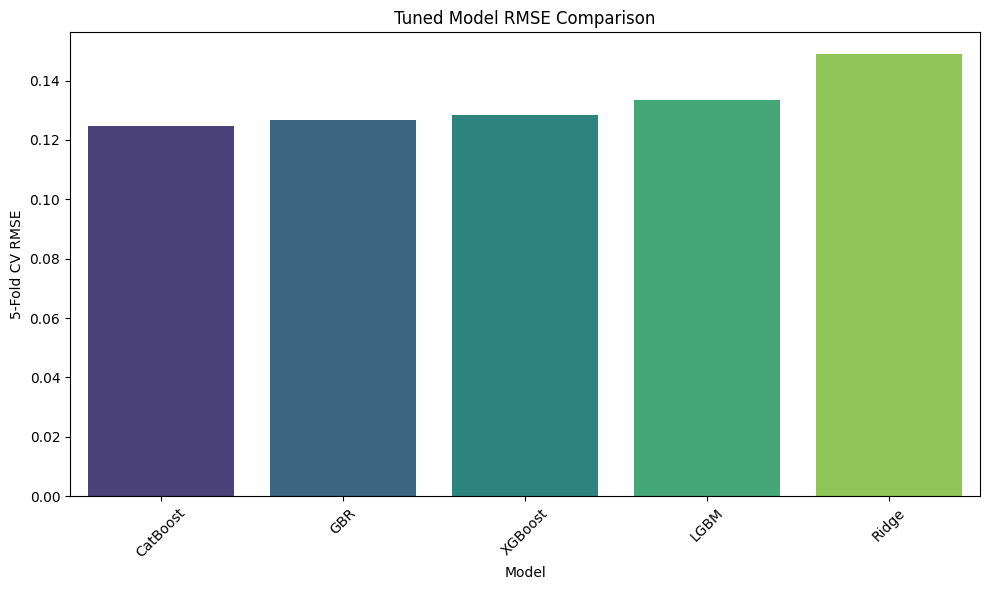

In [152]:
# Build DataFrame & visualize
tuned_df = pd.DataFrame(tuned_scores).set_index('Model').sort_values('Best_RMSE')
print("\nTuned CV RMSEs:")
display(tuned_df[['Best_RMSE']])

plt.figure(figsize=(10, 6))
sns.barplot(
    x=tuned_df.index, 
    y='Best_RMSE', 
    data=tuned_df.reset_index(),
    palette='viridis'
)
plt.ylabel('5-Fold CV RMSE')
plt.xlabel('Model')
plt.title('Tuned Model RMSE Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [153]:
# Pick the best model (lowest RMSE) and retrain on full training set
best_name = tuned_df.index[0]
best_model = tune_models[best_name]
print(f"\nBest model: {best_name} with CV RMSE = {tuned_df.loc[best_name, 'Best_RMSE']:.4f}")

best_model.fit(X_train, y_train)


Best model: CatBoost with CV RMSE = 0.1248


In [154]:
# Predict on test, inverse-transform if needed (e.g. exp if you log-transformed)
X_test_proc = pipeline.transform(test_df)
y_pred = best_model.predict(X_test_proc)

In [155]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})

submission.to_csv('submission_tuned.csv', index=False)
print("\nSubmission file saved to 'submission_tuned.csv'")


Submission file saved to 'submission_tuned.csv'


## Save our best model

In [ ]:
# import joblib

# # Save the best model to file
# model_filename = f'best_model_{best_name}.pkl'
# joblib.dump(best_model, model_filename)
# print(f"Best model saved to '{model_filename}'")

In [157]:
# # Save the preprocessing pipeline too
# pipeline_filename = 'preprocessor_pipeline.pkl'
# joblib.dump(pipeline, pipeline_filename)
# print(f"Preprocessor pipeline saved to '{pipeline_filename}'")

In [158]:
# best_model = joblib.load('best_model_<ModelName>.pkl')
# pipeline   = joblib.load('preprocessor_pipeline.pkl')

# X_test_proc = pipeline.transform(new_df)
# y_pred      = best_model.predict(X_test_proc)